#                                Final Project-AIYS

Name : Akhil A

In [1]:
#Libaries imported for the project.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#CSV files imported for the analysis.
df_ind=pd.read_csv("hospital_beds_per_india_v1.csv",header=0)
df_usa=pd.read_csv("hospital_beds_USA_v1.csv",na_values={"beds":[0]})

In [3]:
df_usa.head()

,country,state,county,lat,lng,type,measure,beds,population,year,source,source_url
0,US,AK,aleutians east,63.588753,-154.493062,ICU,1000HAB,NaN,3338,2019,khn,https://khn.org/news/as-coronavirus-spreads-wi...
1,US,AK,aleutians west,63.588753,-154.493062,ICU,1000HAB,NaN,5784,2019,khn,https://khn.org/news/as-coronavirus-spreads-wi...
2,US,AK,anchorage,63.588753,-154.493062,ACUTE,1000HAB,2.182916,298225,2018,arcgis,https://services1.arcgis.com/Hp6G80Pky0om7QvQ/...
3,US,AK,anchorage,63.588753,-154.493062,ICU,1000HAB,0.244782,298225,2019,khn,https://khn.org/news/as-coronavirus-spreads-wi...
4,US,AK,anchorage,63.588753,-154.493062,OTHER,1000HAB,0.191131,298225,2019,arcgis,https://services1.arcgis.com/Hp6G80Pky0om7QvQ/...


In [4]:
df_ind.head()

,country,state,county,lat,lng,type,measure,beds,population,year,source,source_url
0,IN,AN,NaN,11.7401,92.6586,TOTAL,1000HAB,2.825081,380520,2016,nhp,http://www.cbhidghs.nic.in/showfile.php?lid=1147
1,IN,AP,NaN,15.9129,79.7400,TOTAL,1000HAB,0.436072,53060000,2017,nhp,http://www.cbhidghs.nic.in/showfile.php?lid=1147
2,IN,AR,NaN,28.2180,94.7278,TOTAL,1000HAB,1.427893,1683600,2018,nhp,http://www.cbhidghs.nic.in/showfile.php?lid=1147
3,IN,AS,NaN,26.2006,92.9376,TOTAL,1000HAB,0.497753,34438756,2017,nhp,http://www.cbhidghs.nic.in/showfile.php?lid=1147
4,IN,BR,NaN,25.0961,85.3131,TOTAL,1000HAB,0.094838,122988691,2018,nhp,http://www.cbhidghs.nic.in/showfile.php?lid=1147


# Part 1

Data of India

In [5]:
#Cleaning DataFrames
IN=df_ind[df_ind["state"]=="IN"].index
#Columns with same value on each row are dropped.
df_ind.drop(IN,axis=0,inplace=True)
df_ind.dropna(axis=1,how="all",inplace=True)
for col in df_ind.columns:
    if len(df_ind[col].unique())==1:
        df_ind.drop(col, axis=1,inplace=True)

#TN is droppped as the beds value was very large compared to other beds values
df_ind.drop(df_ind[df_ind["state"]=="TN"].index,inplace=True)
#Dropping lat and lng
dp=["lat","lng"]
for i in dp:
    df_ind.drop(i,axis=1,inplace=True)

In [6]:
#Reference
df_ind.head()

,state,beds,population,year
0,AN,2.825081,380520,2016
1,AP,0.436072,53060000,2017
2,AR,1.427893,1683600,2018
3,AS,0.497753,34438756,2017
4,BR,0.094838,122988691,2018


Stats

In [7]:
#Stats regarding population vs states
smaxp=df_ind[df_ind["population"]==df_ind["population"].max()]          #Data of state with maximum population
sminp=df_ind[(df_ind["population"]==df_ind["population"].min())]        #Data of state with minimum population
smaxb=df_ind[df_ind["beds"]==df_ind["beds"].max()]                      #Data of state with maximum beds
sminb=df_ind[(df_ind["beds"]==df_ind["beds"].min())]
#Data of state with minimum beds
popu=df_ind["population"]
beds=df_ind["beds"]

#Percentage of population, beds
ps=df_ind["population"].sum()
bs=df_ind["beds"].sum()
ps_per=(df_ind["population"]/ps)*100         #Percentage of population in each state
bs_per=(df_ind["beds"]/bs)*100               #Percentage of beds in each state

#data
sdp,sdb=df_ind["population"].std(),df_ind["beds"].std()   #Standard Deviataion of population and beds
popme,popmd=popu.mean(),popu.median()                     #Mean Median Data of population
bme,bmd=md=beds.mean(),beds.median()                      #Mean Median Data of bed

print("Population(Maximum):{}\n State:{}\n Beds:{}\n\n Percentage:\n Max:{}\n Min:{}\n".format(*smaxp["population"].values,*smaxp["state"],*smaxp["beds"].values,ps_per.max(),ps_per.min()))
print("Population(Minimum):{}\n State:{}\n Beds:{}\n".format(*sminp["population"].values,*sminp["state"],*sminp["beds"].values))
print("Centeral Tendency(population)\n mean:{}\n median:{}\n".format(popme,popmd))
print("Centeral Tendency(beds):\n mean:{}\n meadian:{}\n".format(bme,bmd))
print("Standard Devation:\nPopulation:{}\nBeds:{}\n".format(sdp,sdb))

Population(Maximum):221073168
 State:UP
 Beds:0.344954

 Percentage:
 Max:17.539629561413737
 Min:0.006585101515337855

Population(Minimum):83000
 State:LD
 Beds:3.6144580000000004

Centeral Tendency(population)
 mean:36012027.54285714
 median:26300000.0

Centeral Tendency(beds):
 mean:1.0858434857142858
 meadian:0.81519

Standard Devation:
Population:47516179.338471316
Beds:0.9056014914757053



Graphical Data:

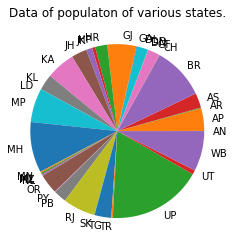

Conclusion: State with maximum value in population is Up, and minimum is LD.


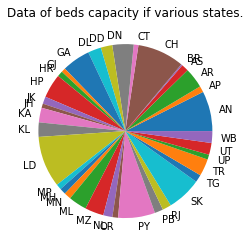

Conclusion: State with maximum value in beds is LD, and minimum is BR.


In [8]:
#Graphs
plt.title("Data of populaton of various states.")
plt.pie(ps_per,labels=df_ind["state"])
plt.show()
print("Conclusion: State with maximum value in population is Up, and minimum is LD.")  
plt.title("Data of beds capacity if various states.")
plt.pie(bs_per,labels=df_ind["state"])
plt.show()
print("Conclusion: State with maximum value in beds is LD, and minimum is BR.")

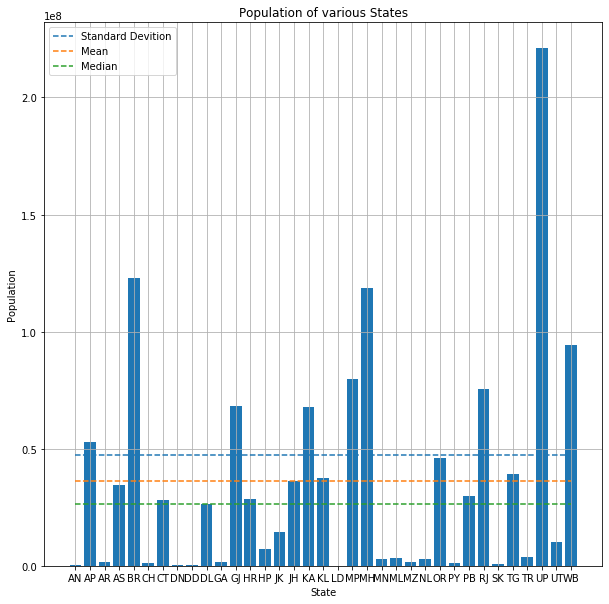

Conclusion: State with maximum value in population is UP, and minimum is LD.
Conclusion: State with maximum value in beds is LD, and minimum is BR.
Conclusion: Mean(36012027.54285714), meadian(26300000.0) and Standard Deviation(47516179.338471316) of population.
Conclusion:The number of states below mean value is 22 and above and equal mean value is 13.
 The number of states below median value is 17 and above and equal median value is 17.


In [9]:
#Graphical data of population of different states, along with data like mean, median, and standard deviation
plt.figure(figsize=(10,10))
plt.xlabel("State")
plt.ylabel("Population")
plt.title("Population of various States")
plt.bar(df_ind["state"],popu)
plt.yscale("linear")
plt.plot(df_ind["state"],[sdp]*len(df_ind["state"].index),"--",label="Standard Devition")
plt.plot(df_ind["state"],[popme]*len(df_ind["state"].index),"--",label="Mean")
plt.plot(df_ind["state"],[popmd]*len(df_ind["state"].index),"--",label="Median")
plt.legend()
plt.grid()
plt.show()
a,b,c,d=(df_ind["state"][df_ind["population"]<popme]).count(),(df_ind["state"][df_ind["population"]>popme]).count(),(df_ind["state"][df_ind["population"]<popmd]).count(),(df_ind["state"][df_ind["population"]>popmd]).count()
print("Conclusion: State with maximum value in population is UP, and minimum is LD.")
print("Conclusion: State with maximum value in beds is LD, and minimum is BR.")
print("Conclusion: Mean(36012027.54285714), meadian(26300000.0) and Standard Deviation(47516179.338471316) of population.")
print("Conclusion:The number of states below mean value is {} and above and equal mean value is {}.\n The number of states below median value is {} and above and equal median value is {}.".format(a,b,c,d))

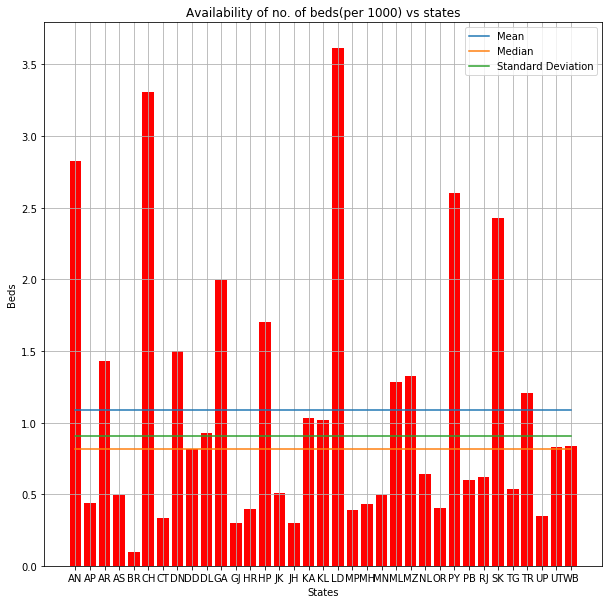

Conclusion: Mean(1.0858434857142858), Median(0.81519), Standard Deviation(0.9056014914757053) in beds.
Conclusion:The number of states below mean value is 23 and above and equal mean value is 12.
 The number of states below median value is 17 and above and equal median value is 17.


In [10]:
#Graphical representation of data about beds availability per 1000 in India, along with central tendency datas.
plt.figure(figsize=(10,10))
plt.xlabel("States")
plt.ylabel("Beds")
plt.title("Availability of no. of beds(per 1000) vs states")
plt.bar(df_ind["state"],beds,color="red")
plt.plot(df_ind["state"],[bme]*len(df_ind["state"].index),label="Mean")
plt.plot(df_ind["state"],[bmd]*len(df_ind["state"].index),label="Median")
plt.plot(df_ind["state"],[sdb]*len(df_ind["state"].index),label="Standard Deviation")
plt.grid()
plt.legend()
plt.show()
print("Conclusion: Mean(1.0858434857142858), Median(0.81519), Standard Deviation(0.9056014914757053) in beds.")
a,b,c,d=(df_ind["state"][df_ind["beds"]<bme]).count(),(df_ind["state"][df_ind["beds"]>bme]).count(),(df_ind["state"][df_ind["beds"]<bmd]).count(),(df_ind["state"][df_ind["beds"]>bmd]).count()
print("Conclusion:The number of states below mean value is {} and above and equal mean value is {}.\n The number of states below median value is {} and above and equal median value is {}.".format(a,b,c,d))

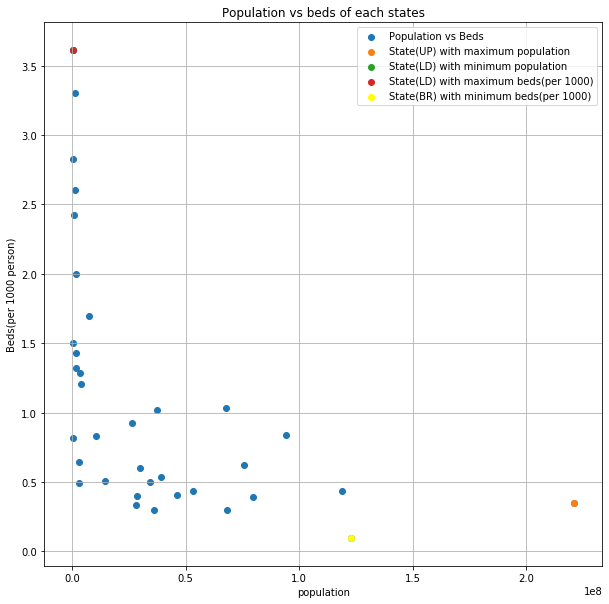

Conclusion: State with maximum value in population is Up, and minimum is LD.
Conclusion: State with maximum value in beds is LD, and minimum is BR.
Conclusion: Mean(36012027.54285714), meadian(26300000.0) and Standard Deviation(47516179.338471316) of population
Conclusion: Mean(1.0858434857142858), Median(0.81519), Standard Deviation(0.9056014914757053) in beds


In [11]:
#Graphical representation of Population and beds in each state
plt.figure(figsize=(10,10))
plt.xlabel("population")
plt.ylabel("Beds(per 1000 person)")
plt.title("Population vs beds of each states")
plt.scatter(df_ind["population"],df_ind["beds"],label="Population vs Beds")
plt.scatter(smaxp["population"],smaxp["beds"],label="State({}) with maximum population".format(*smaxp["state"].values))
plt.scatter(sminp["population"],sminp["beds"],label="State({}) with minimum population".format(*sminp["state"].values))
plt.scatter(smaxb["population"],smaxb["beds"],label="State({}) with maximum beds(per 1000)".format(*smaxb["state"].values))
plt.scatter(sminb["population"],sminb["beds"],label="State({}) with minimum beds(per 1000)".format(*sminb["state"].values),color="yellow")
plt.grid()
plt.legend()
plt.show()
print("Conclusion: State with maximum value in population is Up, and minimum is LD.")
print("Conclusion: State with maximum value in beds is LD, and minimum is BR.")
print("Conclusion: Mean(36012027.54285714), meadian(26300000.0) and Standard Deviation(47516179.338471316) of population")
print("Conclusion: Mean(1.0858434857142858), Median(0.81519), Standard Deviation(0.9056014914757053) in beds")

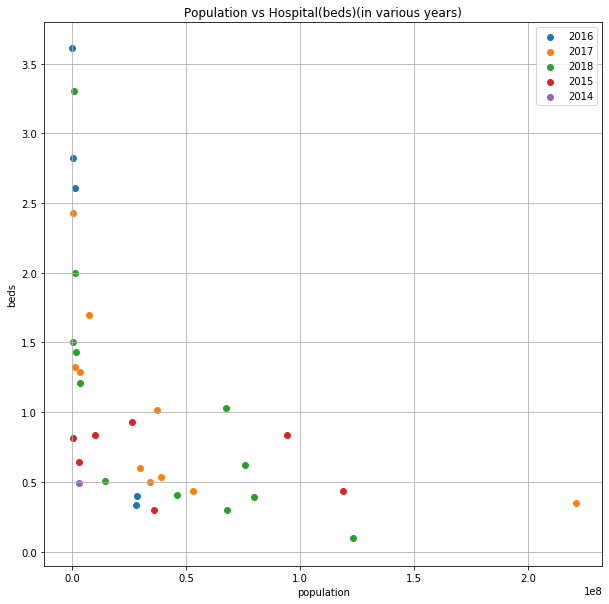

Conclusion: State with maximum value in population is Up, and minimum is LD.
Conclusion: State with maximum value in beds is LD, and minimum is BR.
Conclusion: Mean(36012027.54285714), meadian(26300000.0) and Standard Deviation(47516179.338471316) of population.
Conclusion: Mean(1.0858434857142858), Median(0.81519), Standard Deviation(0.9056014914757053) in beds


In [12]:
#Graphical Data of Population vs Hospital beds on the basis of various years
plt.figure(figsize=(10,10))
plt.xlabel("population")
plt.ylabel("beds")
plt.title("Population vs Hospital(beds)(in various years)")
plt.scatter(df_ind["population"][df_ind["year"]==2016],df_ind.beds[df_ind["year"]==2016],label="2016")
plt.scatter(df_ind["population"][df_ind["year"]==2017],df_ind.beds[df_ind["year"]==2017],label="2017")
plt.scatter(df_ind["population"][df_ind["year"]==2018],df_ind.beds[df_ind["year"]==2018],label="2018")
plt.scatter(df_ind["population"][df_ind["year"]==2015],df_ind.beds[df_ind["year"]==2015],label="2015")
plt.scatter(df_ind["population"][df_ind["year"]==2014],df_ind.beds[df_ind["year"]==2014],label="2014")
plt.legend()
plt.grid()
plt.show()
print("Conclusion: State with maximum value in population is Up, and minimum is LD.")
print("Conclusion: State with maximum value in beds is LD, and minimum is BR.")
print("Conclusion: Mean(36012027.54285714), meadian(26300000.0) and Standard Deviation(47516179.338471316) of population.")
print("Conclusion: Mean(1.0858434857142858), Median(0.81519), Standard Deviation(0.9056014914757053) in beds")

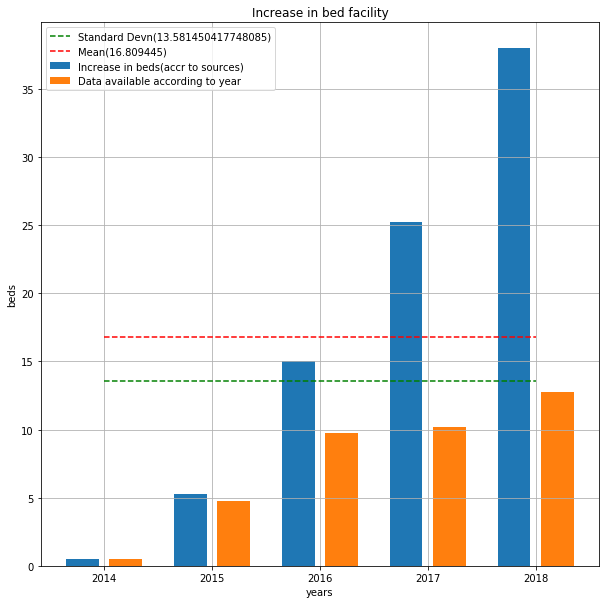

Consclusion: Mean(16.809445), Standard Deviation(13.581450417748085)


In [13]:
#Increase in the beds in a range of years in India
#The x-axis represents the years in ascending order. The y-axis representing the total number of beds available.

#Stats

years=df_ind["year"].unique()  #years available in data of India
years.sort()

data=[]                        #data of increment in bed facility in various years
bdy=[]                         #source of data available about beds in various years
bd=0
for year in years:
    bd=bd+df_ind["beds"][df_ind["year"]==year].sum()
    data.append(bd)
    bdy.append(df_ind["beds"][df_ind["year"]==year].sum())
bme=np.array(data).mean()      #Mean of total beds per year
#bmd=np.array(data).median()
bsdt=np.array(data).std()      #Standard Deviation of total beds per year

#Graph
plt.figure(figsize=(10,10))
xpos=np.arange(len(years))
plt.xlabel("years")
plt.ylabel("beds")
plt.title("Increase in bed facility")
plt.xticks(xpos,years)
plt.bar(xpos-0.2,data,width=0.3,label="Increase in beds(accr to sources)")
plt.bar(xpos+0.2,bdy,width=0.3,label="Data available according to year")
plt.plot(xpos,[bsdt]*len(years),"g--",label=("Standard Devn({})".format(bsdt)))
plt.plot(xpos,[bme]*len(years),"r--",label="Mean({})".format(bme))
plt.legend()
plt.grid()
plt.show()
print("Consclusion: Mean({}), Standard Deviation({})".format(bme,bsdt))

# Part 2

Data of USA

In [14]:
#Reference of the dataframe
df_usa.head()

,country,state,county,lat,lng,type,measure,beds,population,year,source,source_url
0,US,AK,aleutians east,63.588753,-154.493062,ICU,1000HAB,NaN,3338,2019,khn,https://khn.org/news/as-coronavirus-spreads-wi...
1,US,AK,aleutians west,63.588753,-154.493062,ICU,1000HAB,NaN,5784,2019,khn,https://khn.org/news/as-coronavirus-spreads-wi...
2,US,AK,anchorage,63.588753,-154.493062,ACUTE,1000HAB,2.182916,298225,2018,arcgis,https://services1.arcgis.com/Hp6G80Pky0om7QvQ/...
3,US,AK,anchorage,63.588753,-154.493062,ICU,1000HAB,0.244782,298225,2019,khn,https://khn.org/news/as-coronavirus-spreads-wi...
4,US,AK,anchorage,63.588753,-154.493062,OTHER,1000HAB,0.191131,298225,2019,arcgis,https://services1.arcgis.com/Hp6G80Pky0om7QvQ/...


Cleaning of Data

In [15]:
#All the row with na value are dropped.
df_usa.dropna(axis=1,how="all",inplace=True)
#To drop the rows with na values(data with beds value 0 have been made na).
df_usa.dropna(inplace=True)
#All the columns with same value are dropped.
for col in df_usa.columns:
    if len(df_usa[col].unique())==1:
        df_usa.drop(col,axis=1,inplace=True)
#Columns like source and source_url are dropped.
d=("source","source_url")
for dd in d:
    df_usa.drop(dd,axis=1,inplace=True)

In [16]:
#DataFrame after cleaning
df_usa.head()

,state,county,lat,lng,type,beds,population,year
2,AK,anchorage,63.588753,-154.493062,ACUTE,2.182916,298225,2018
3,AK,anchorage,63.588753,-154.493062,ICU,0.244782,298225,2019
4,AK,anchorage,63.588753,-154.493062,OTHER,0.191131,298225,2019
5,AK,anchorage,63.588753,-154.493062,PSYCHIATRIC,0.938888,298225,2018
6,AK,bethel,63.588753,-154.493062,ICU,2.060478,17957,2018


Stats and Graph

In [17]:
#Data on different tpyes of hospital facility beds in USA
#Stats

typ=df_usa["type"].unique()          #Types of Hospital Facility
d_beds_t=[]                          #Data on beds count according to types
for t in typ:
    d_beds_t.append(df_usa["beds"][df_usa["type"]==t].sum())




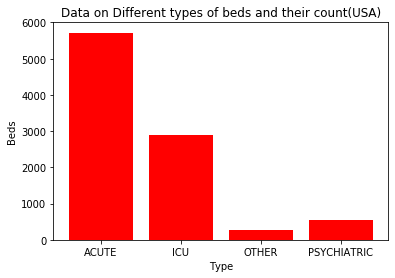

Conclusion: USA has maximum bed facility in ACUTE  type and minimum in OTHER.


In [18]:
#Graph on various types of beds facility
plt.xlabel("Type")
plt.ylabel("Beds")
plt.title("Data on Different types of beds and their count(USA)")
plt.bar(typ,d_beds_t,color="r")
plt.show()
print("Conclusion: USA has maximum bed facility in ACUTE  type and minimum in OTHER.")

In [19]:
#Unique values in each columns  for data analysis
d_state=df_usa["state"].unique()
d_type=df_usa["type"].unique()
d_county=df_usa["county"].unique()

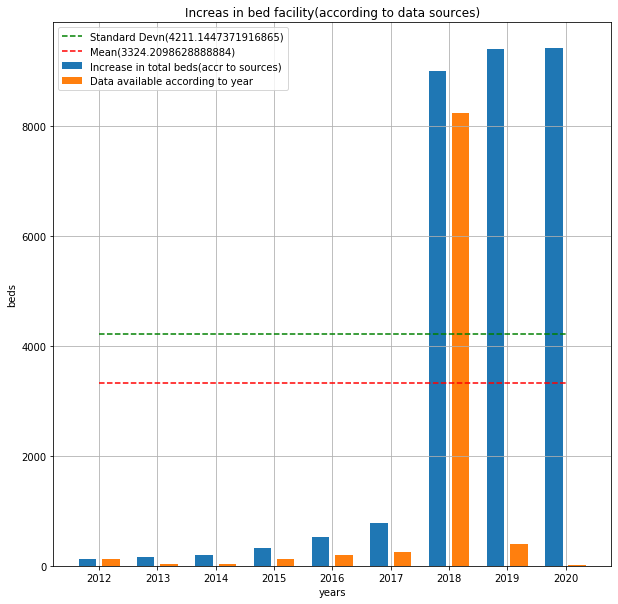

Conclusion: Standard Deviation(4211.1447371916865),Mean(3324.2098628888884)


In [20]:
#Increase in the beds in a range of years in USA
#The x-axis represents the years in ascending order. The y-axis representing the total number of beds available.

#Stats

years=df_usa["year"].unique()  #years available in data of India
years.sort()

data=[]                        #data of increment in bed facility in various years#
bdy=[]                         #source of data available about beds in various years
bd=0
for year in years:
    bd=bd+df_usa["beds"][df_usa["year"]==year].sum()
    data.append(bd)
    bdy.append(df_usa.beds[df_usa["year"]==year].sum())
bme=np.array(data).mean()      #Mean of total beds per year
bsdt=np.array(data).std()      #Standard Deviation of total beds per year

#Graph
plt.figure(figsize=(10,10))
xpos=np.arange(len(years))
plt.xlabel("years")
plt.ylabel("beds")
plt.title("Increas in bed facility(according to data sources)")
plt.xticks(xpos,years)
plt.bar(xpos-0.2,data,width=0.3,label="Increase in total beds(accr to sources)")
plt.bar(xpos+0.2,bdy,width=0.3,label="Data available according to year")
plt.plot(xpos,[bsdt]*len(years),"g--",label=("Standard Devn({})".format(bsdt)))
plt.plot(xpos,[bme]*len(years),"r--",label="Mean({})".format(bme))
plt.legend()
plt.grid()
plt.show()
print("Conclusion: Standard Deviation({}),Mean({})".format(bsdt,bme))

Filter

In [21]:
#This is code to filter data according to different states and county (dropping the type and year datas)
#This is done to reduce the data to required data providing information regarding population and beds
#of various states and their county.
#The data is used to provide graph of various state vs population or beds available
usa_g=df_usa.groupby("state")
data=pd.DataFrame()
for s,sd in usa_g:
    county_d=sd["county"].unique()
    for coun in county_d:
        m_coun=sd[sd["county"]==coun]
        years=m_coun["year"].unique()
        for year in years:
            y_coun=m_coun[m_coun["year"]==year]
            beds_d=y_coun["beds"].sum()
            y_coun["beds"]=beds_d
            m_coun.loc[:,"beds"][m_coun["year"]==year]=beds_d
        m_coun.drop("type",axis=1,inplace=True)
        m_coun.drop_duplicates(inplace=True)
        beds_cd=m_coun["beds"].sum()
        if len(m_coun.index)>1:
            m_coun["beds"]=beds_cd
        m_coun.drop("year",inplace=True,axis=1)
        m_coun.drop_duplicates(inplace=True,ignore_index=True)
        if len(data.columns)!=len(m_coun.columns):
            data=pd.DataFrame(columns=m_coun.columns)
        data=pd.concat((data,m_coun))

data.index=np.arange(len(data.index))

/home/akhil/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/home/akhil/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/home/akhil/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:8767: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_g

In [22]:
data

,state,county,lat,lng,beds,population
0,AK,anchorage,63.588753,-154.493062,3.557717,298225
1,AK,bethel,63.588753,-154.493062,2.060478,17957
2,AK,dillingham,63.588753,-154.493062,2.814636,4974
3,AK,fairbanks north star,63.588753,-154.493062,2.299288,100031
4,AK,juneau,63.588753,-154.493062,2.034902,32434
...,...,...,...,...,...,...
2520,WY,sweetwater,43.075968,-107.290284,2.807286,44527
2521,WY,teton,43.075968,-107.290284,2.355713,22923
2522,WY,uinta,43.075968,-107.290284,11.128239,20758
2523,WY,washakie,43.075968,-107.290284,2.181025,8253


In [23]:
data.describe()

,lat,lng,beds
count,2525.000000,2525.000000,2525.000000
mean,38.460948,-92.062959,3.727917
std,5.244436,12.671340,4.355344
min,19.898682,-155.665857,0.030639
25%,34.972730,-99.901813,1.653464
50%,38.802610,-89.398528,2.787879
75%,41.878003,-82.907123,4.322596
max,63.588753,-69.445469,94.155844


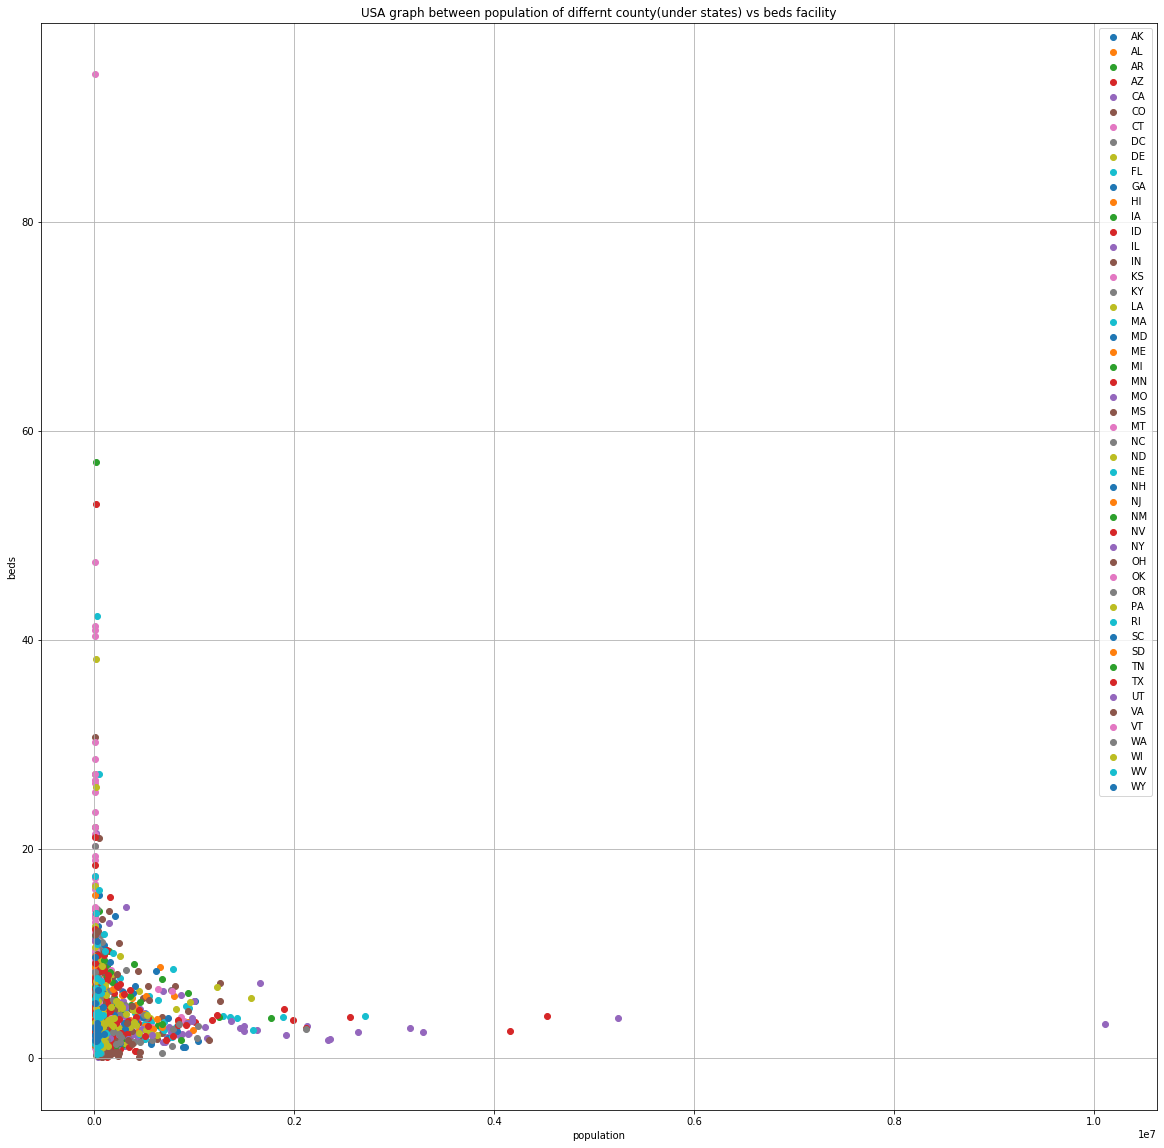

Conclusion: The graph shows the data of various states on the basis of the population and beds facility.


In [24]:
#Graph of population of diiferent countys and their beds capacity.
states=data.groupby("state")
p_max=data["population"].max()
plt.figure(figsize=(20,20))
plt.title("USA graph between population of differnt county(under states) vs beds facility")
for sn,sd in states:
    plt.scatter(sd["population"],sd["beds"],label=sn)
plt.xlabel("population")
plt.ylabel("beds")
plt.legend()
plt.grid()
plt.show()
print("Conclusion: The graph shows the data of various states on the basis of the population and beds facility.")

/home/akhil/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if sys.path[0] == '':


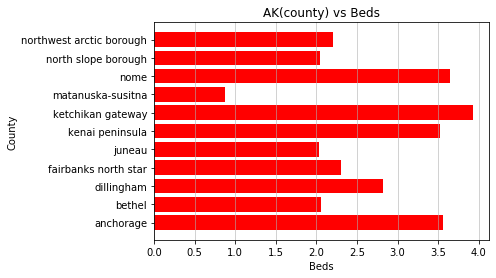

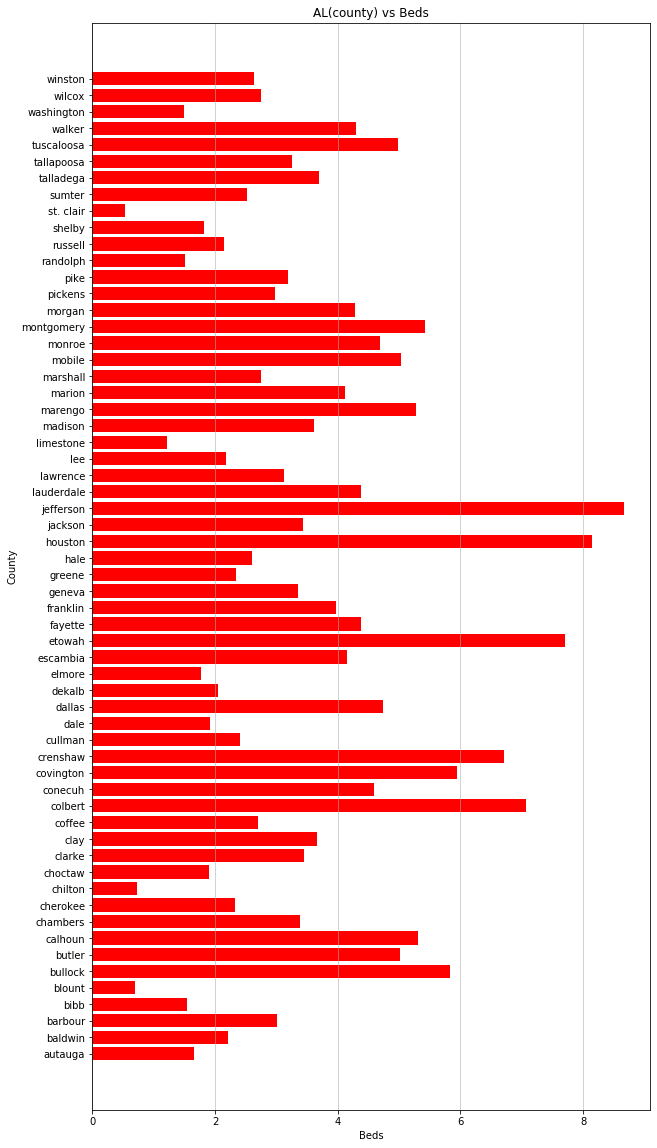

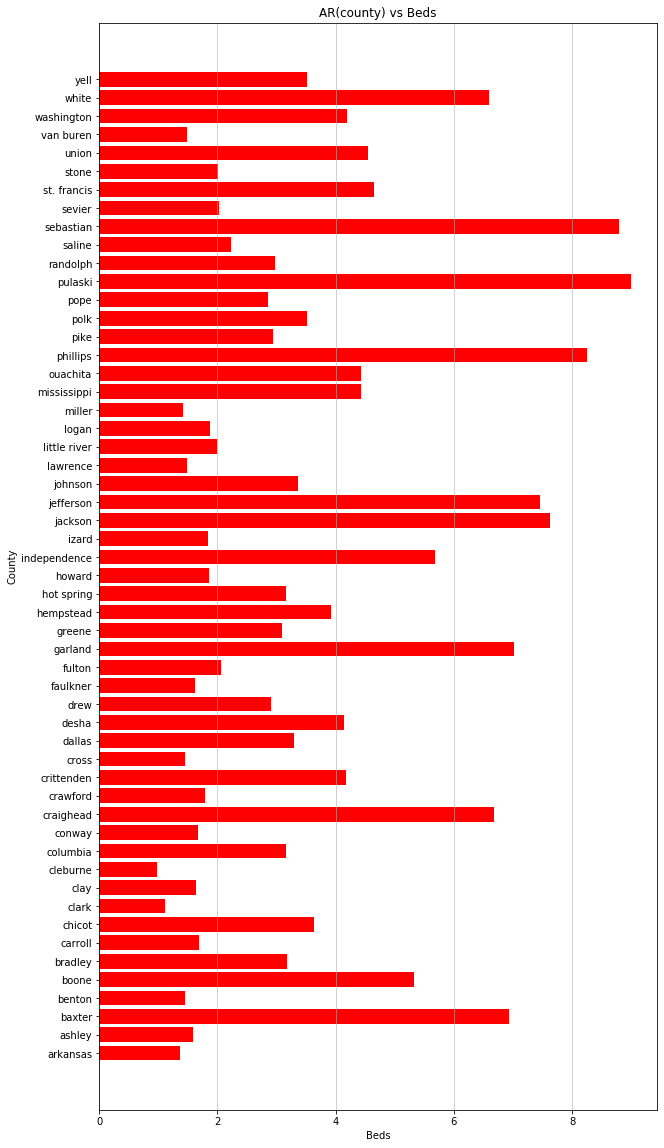

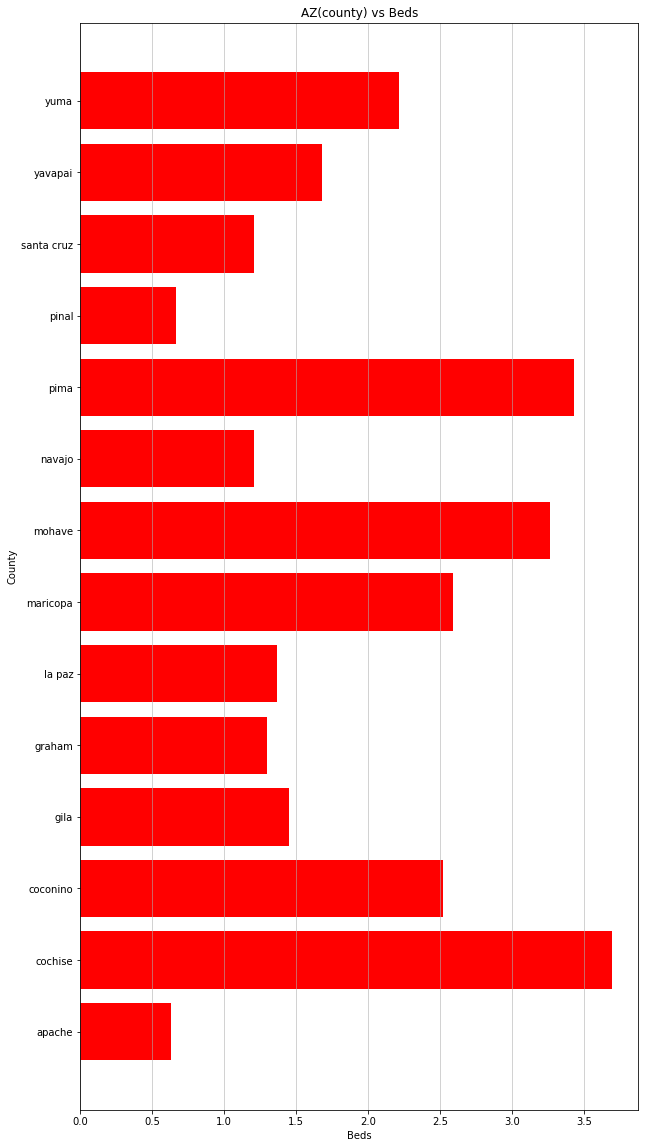

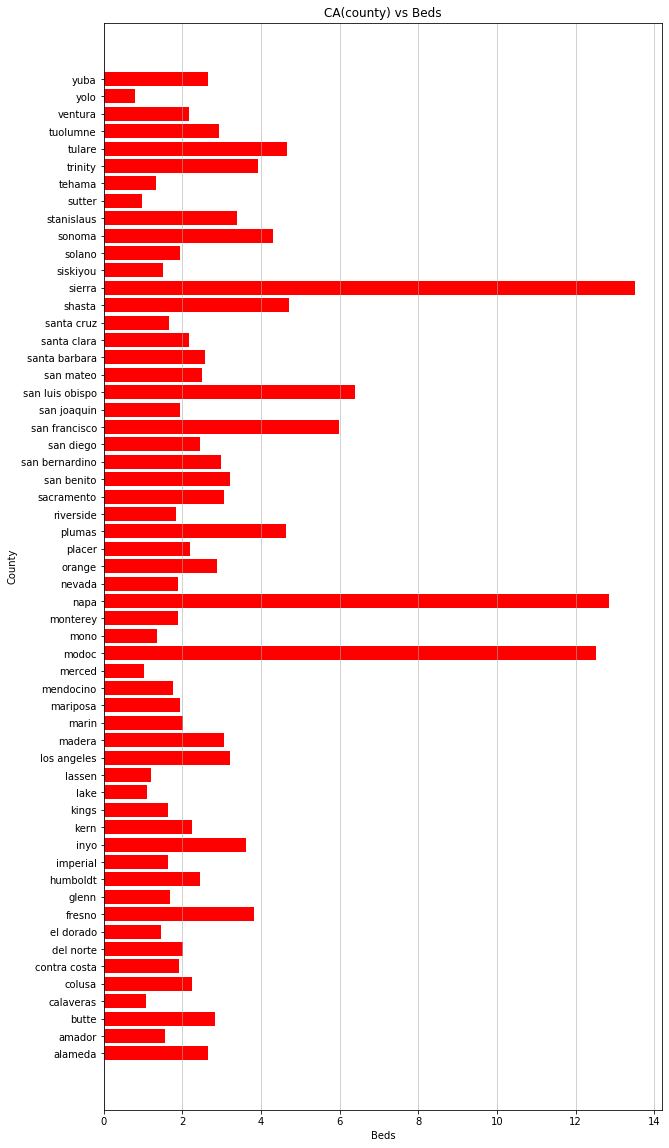

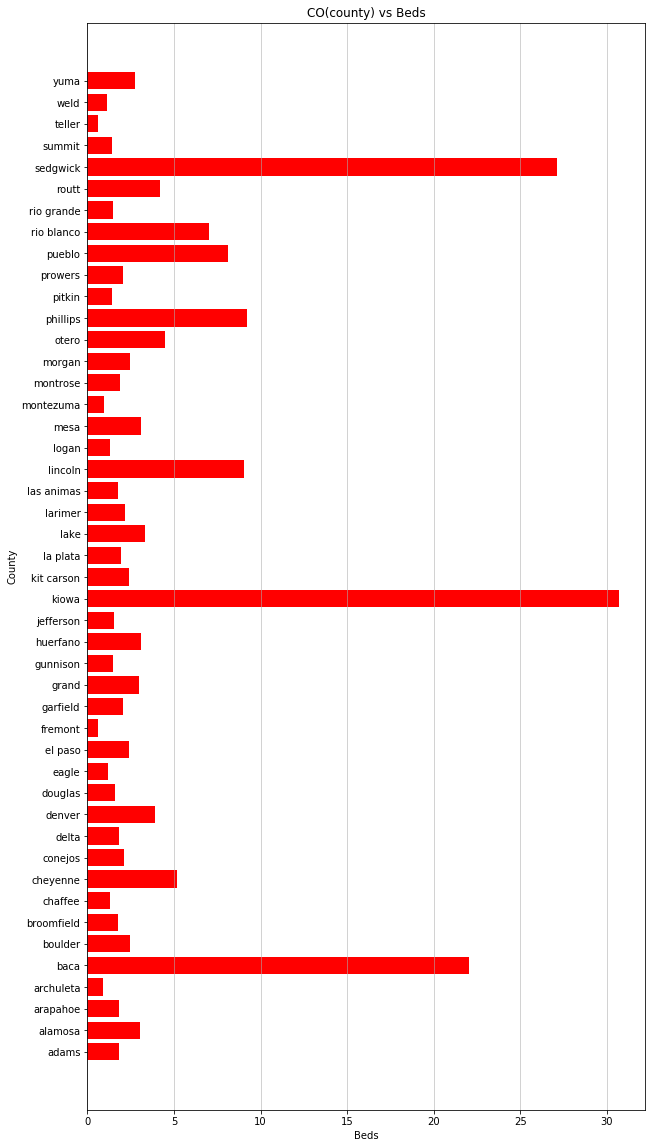

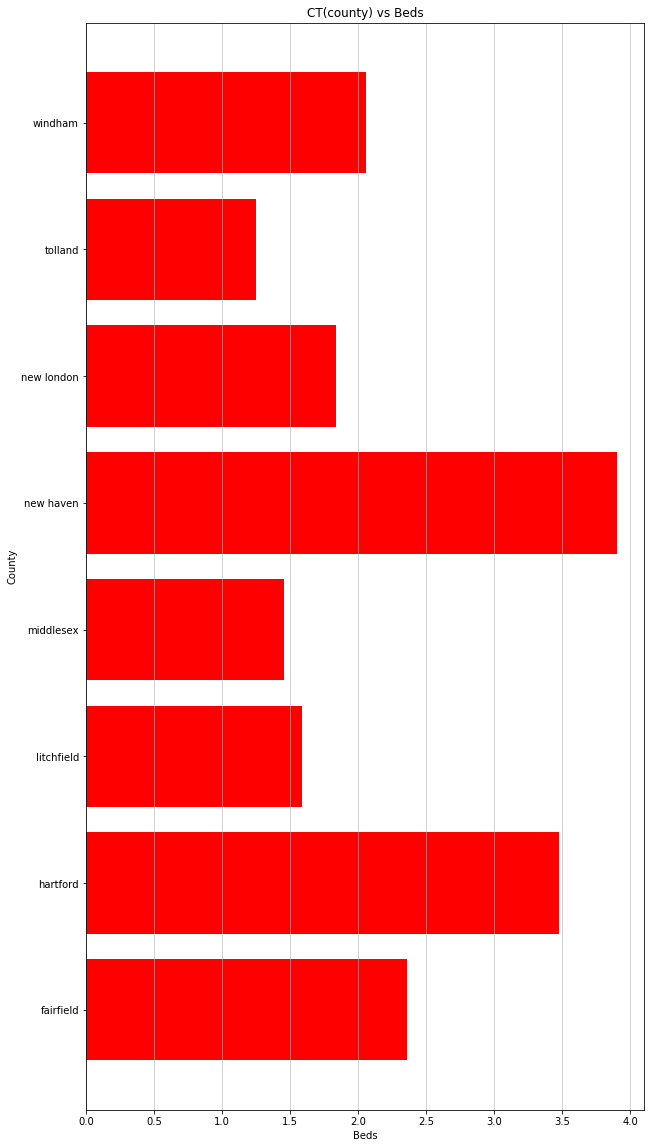

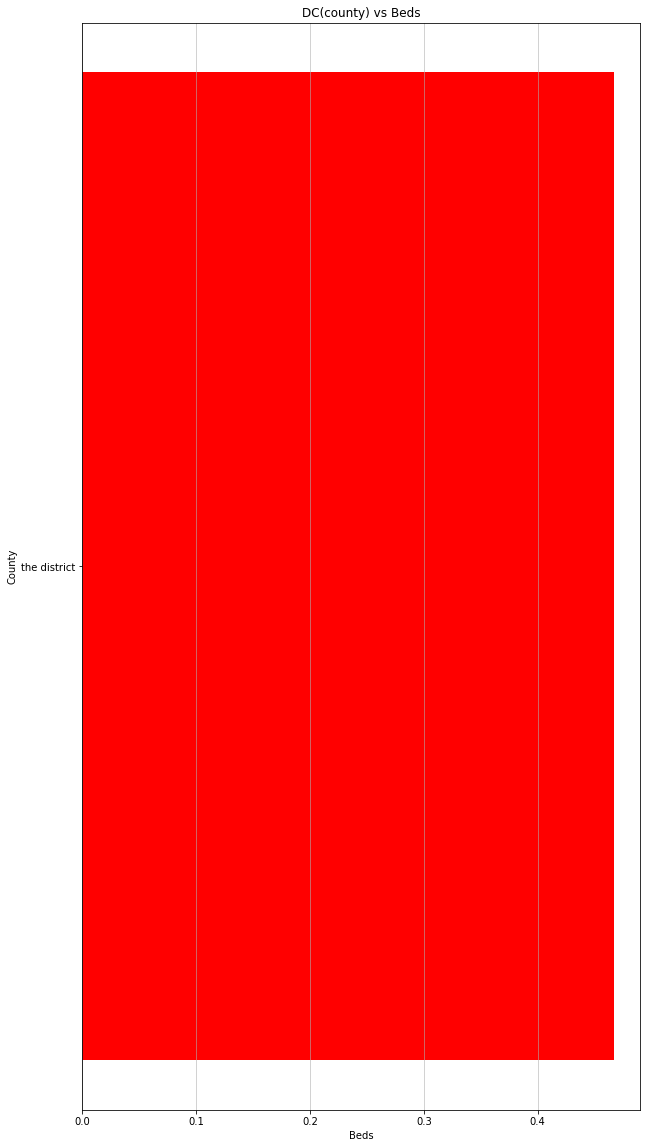

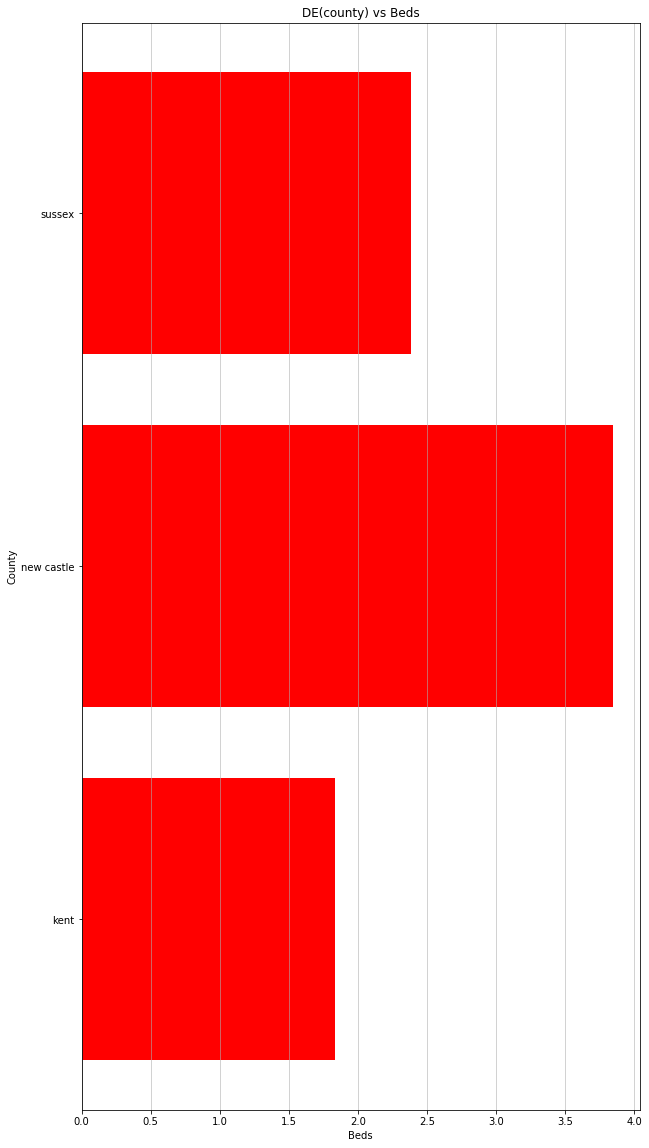

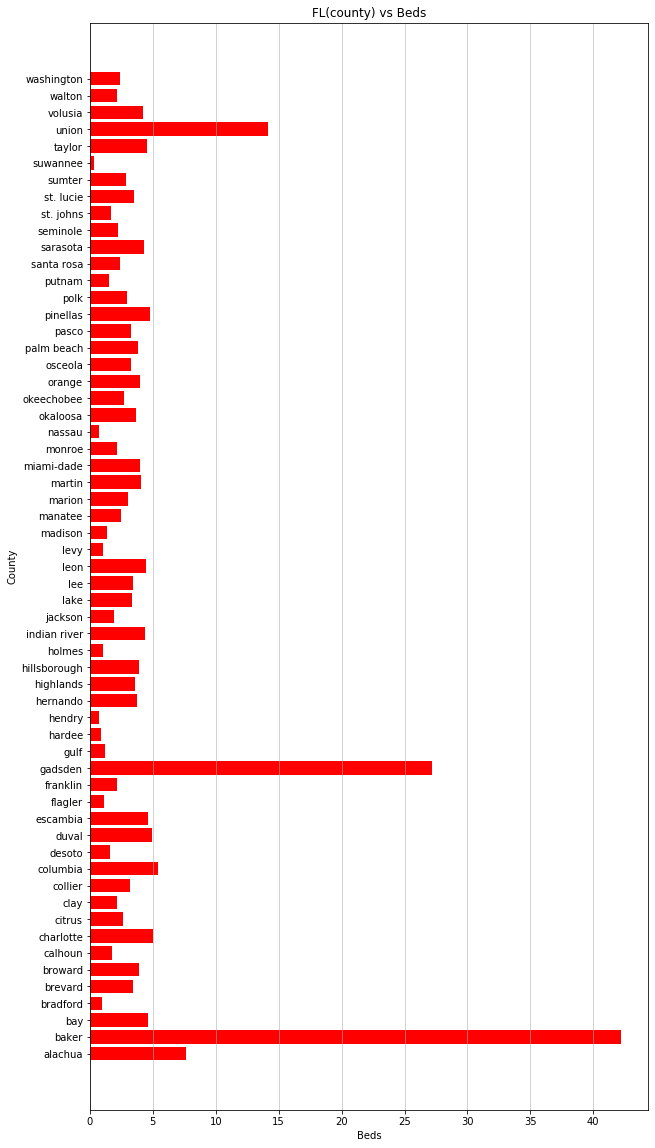

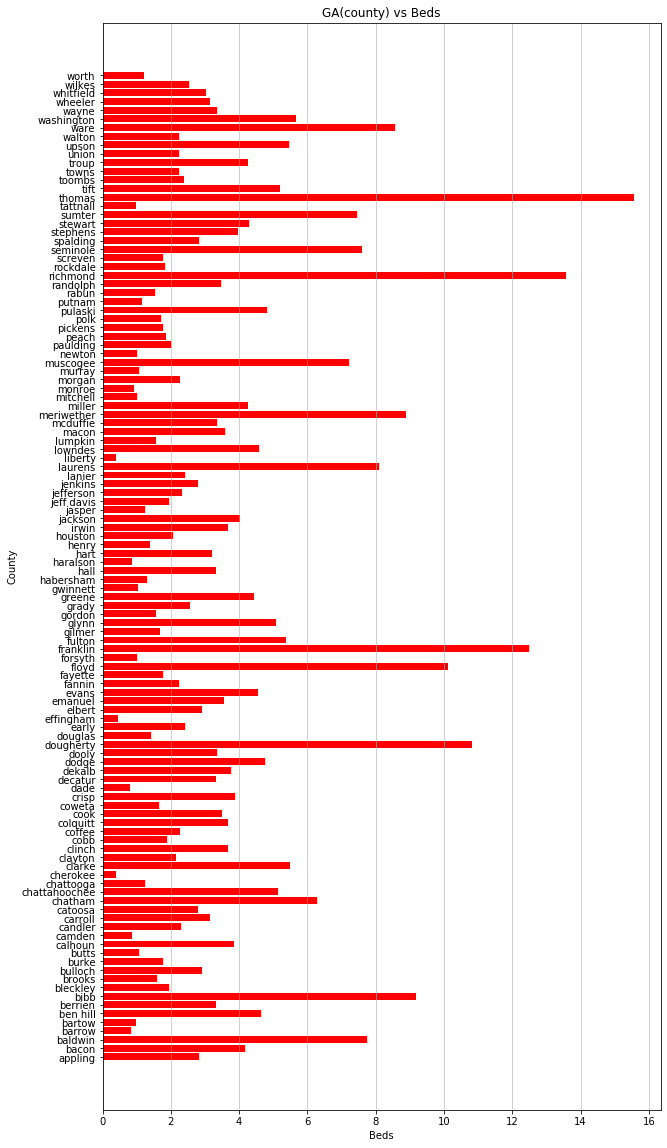

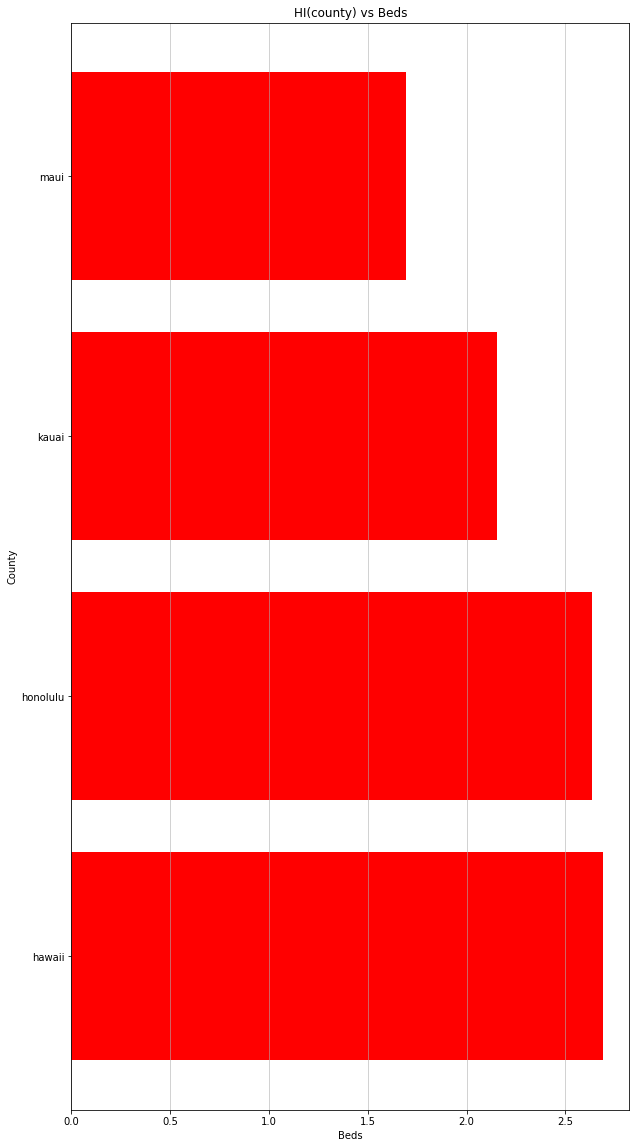

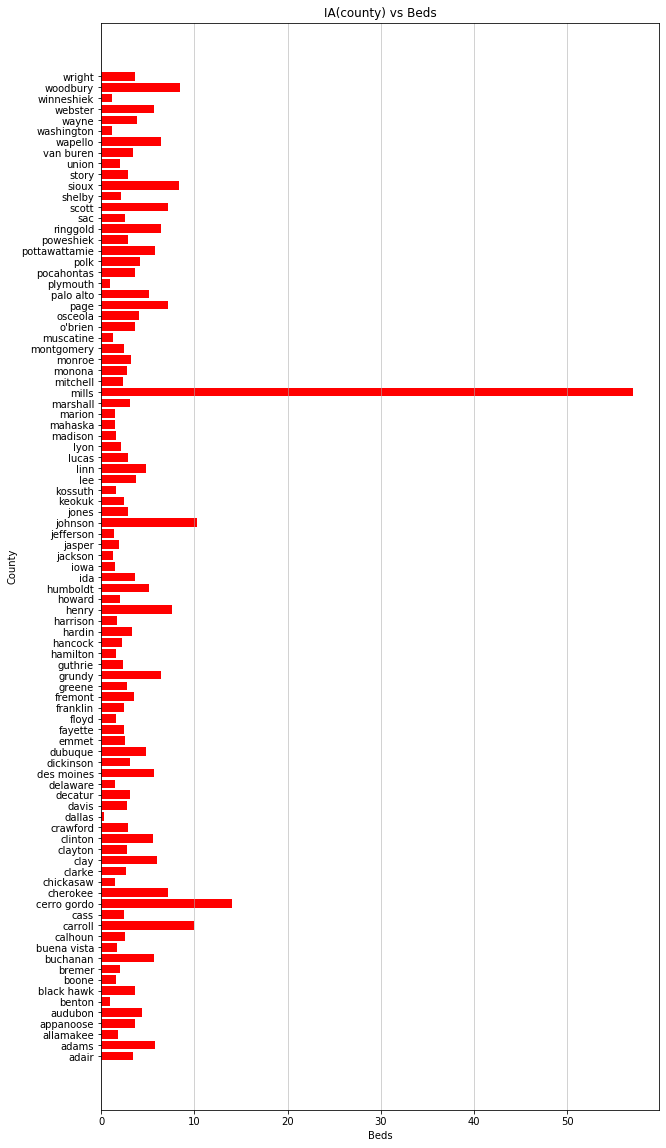

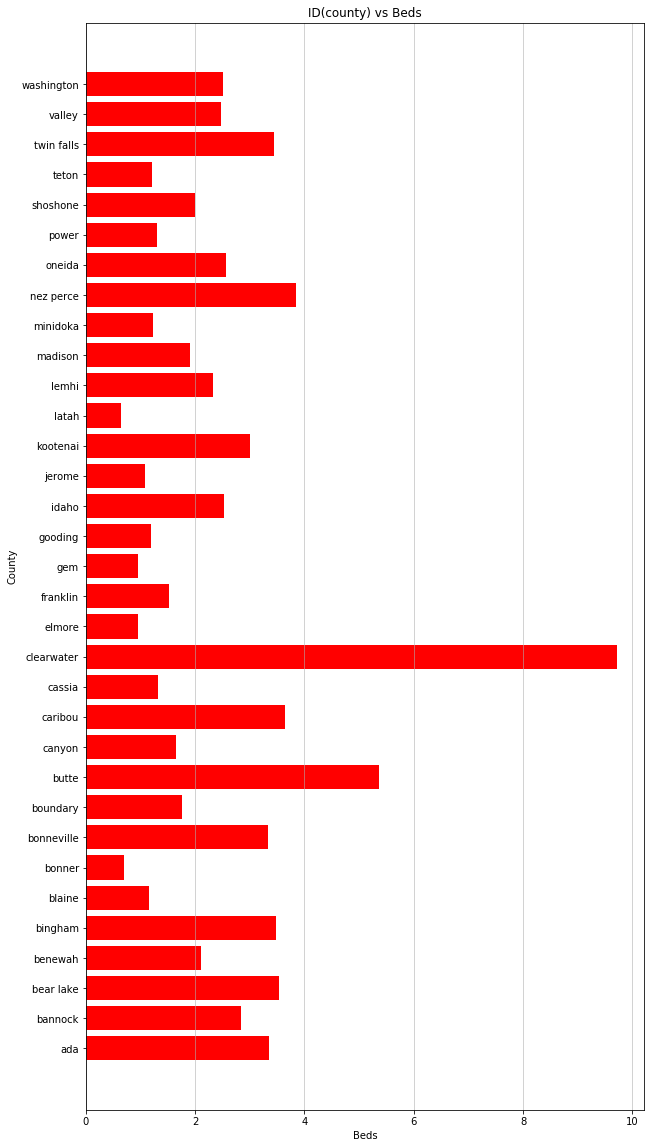

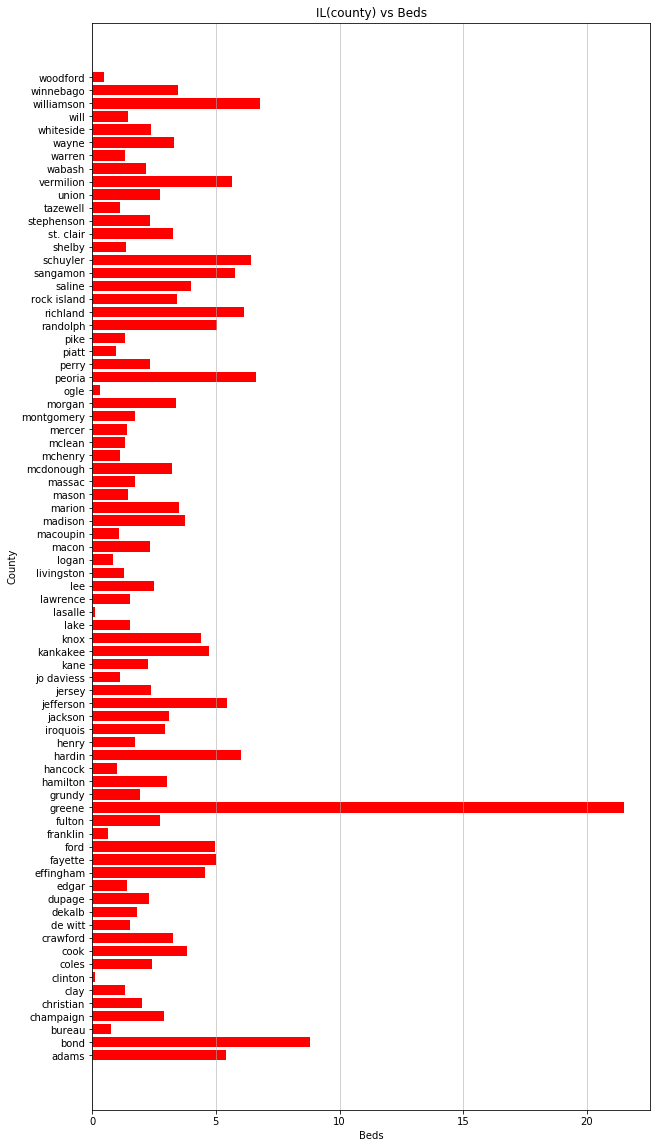

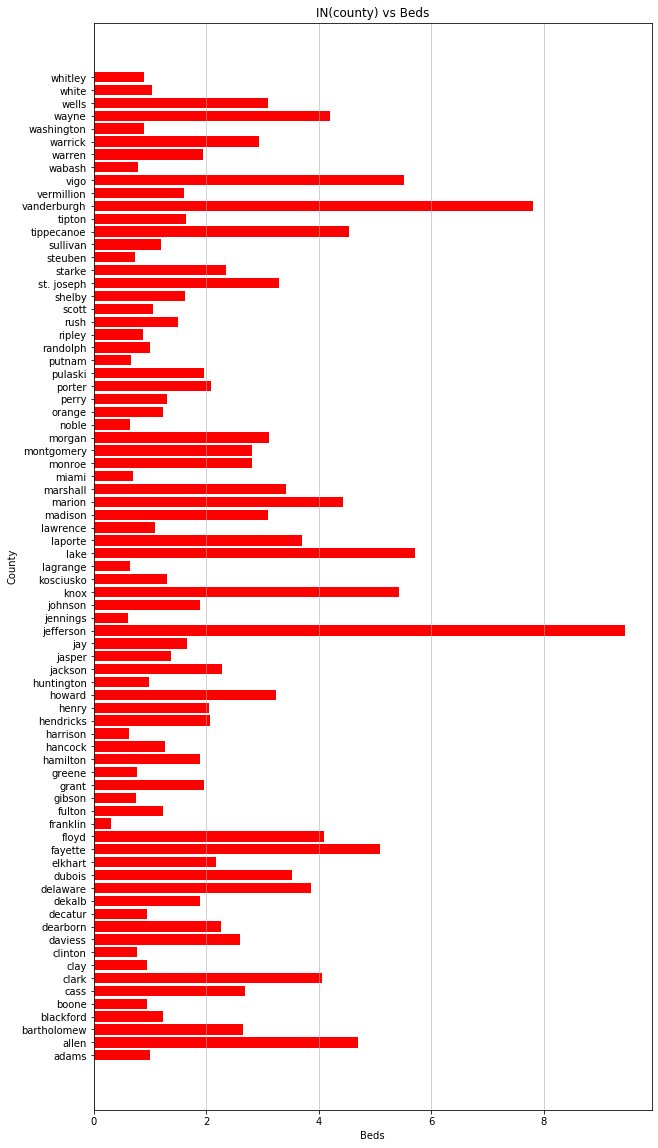

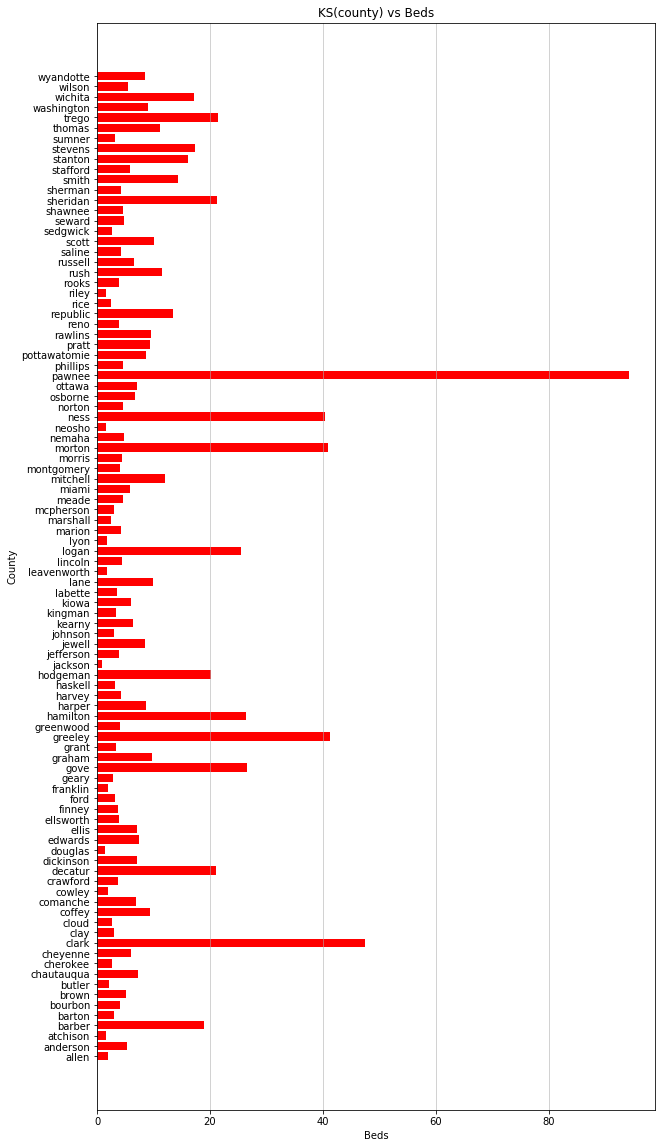

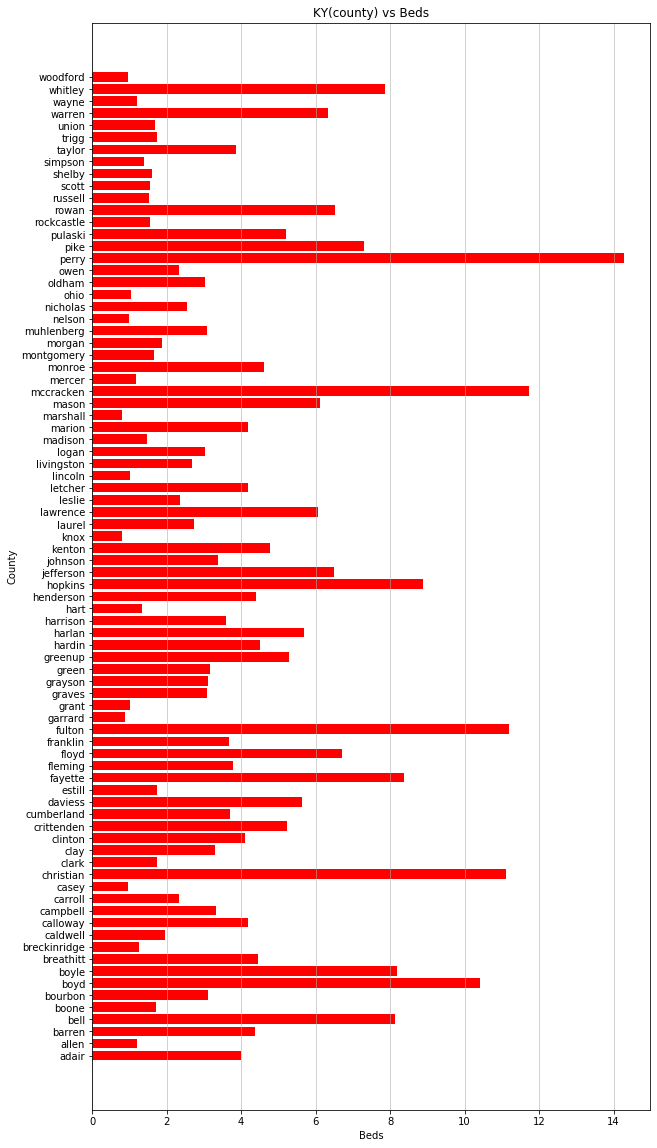

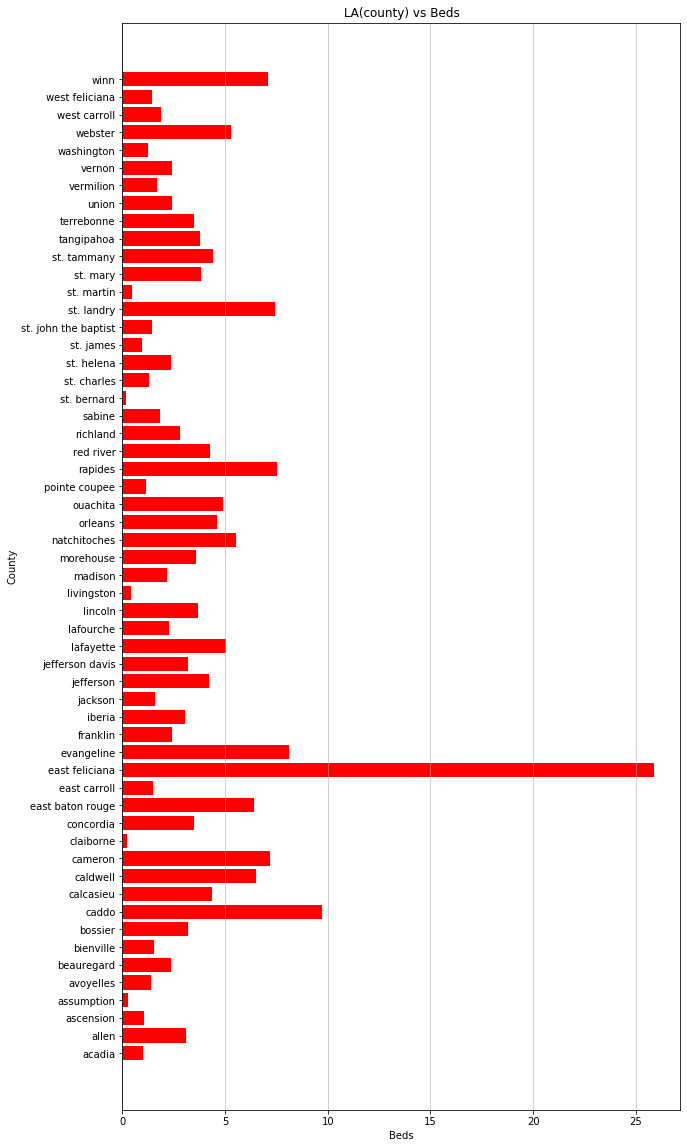

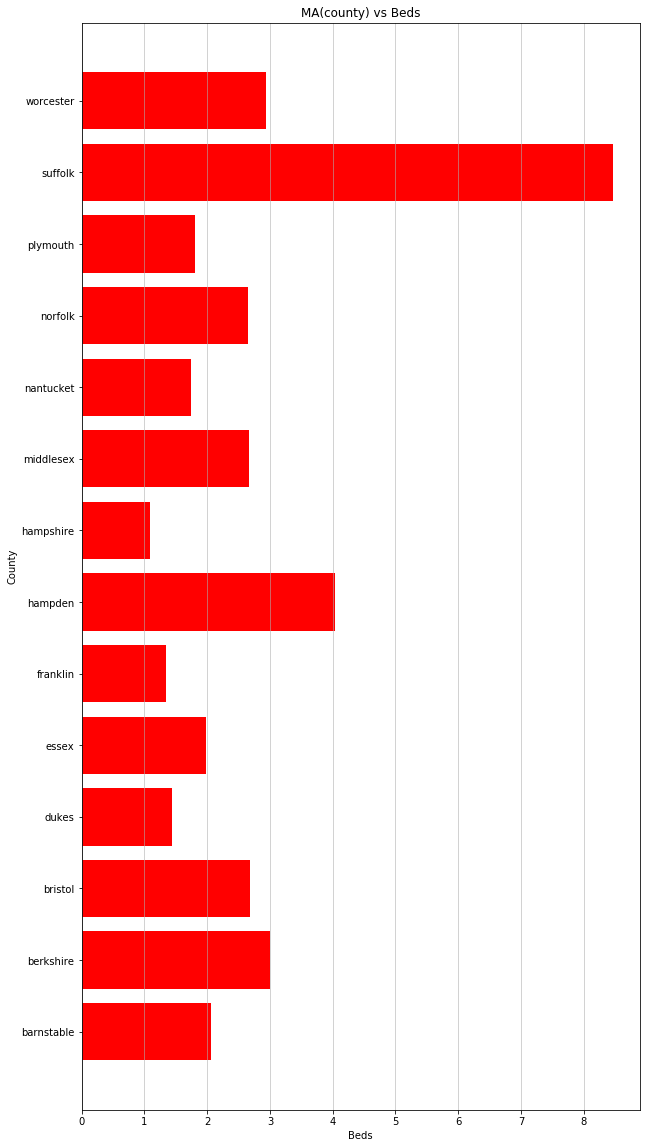

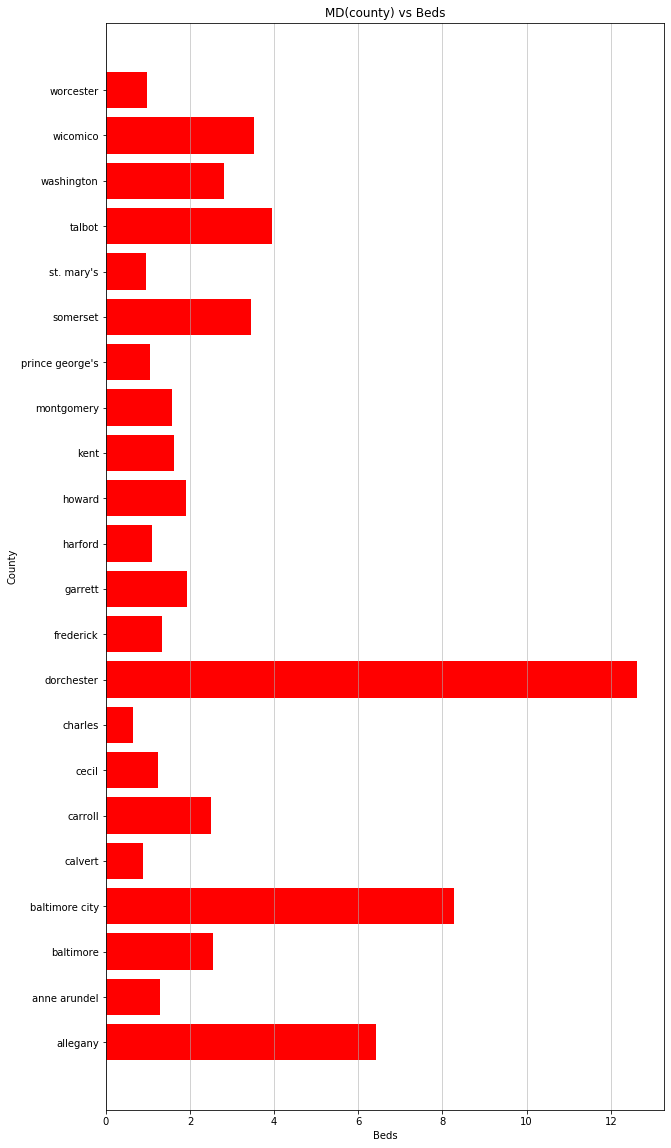

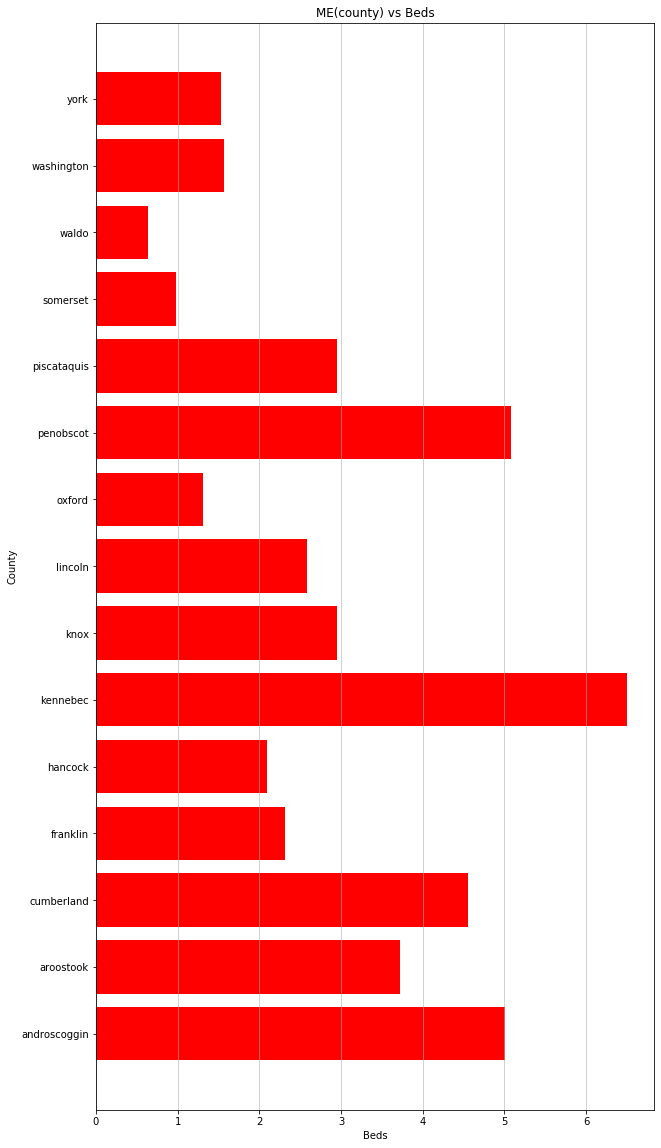

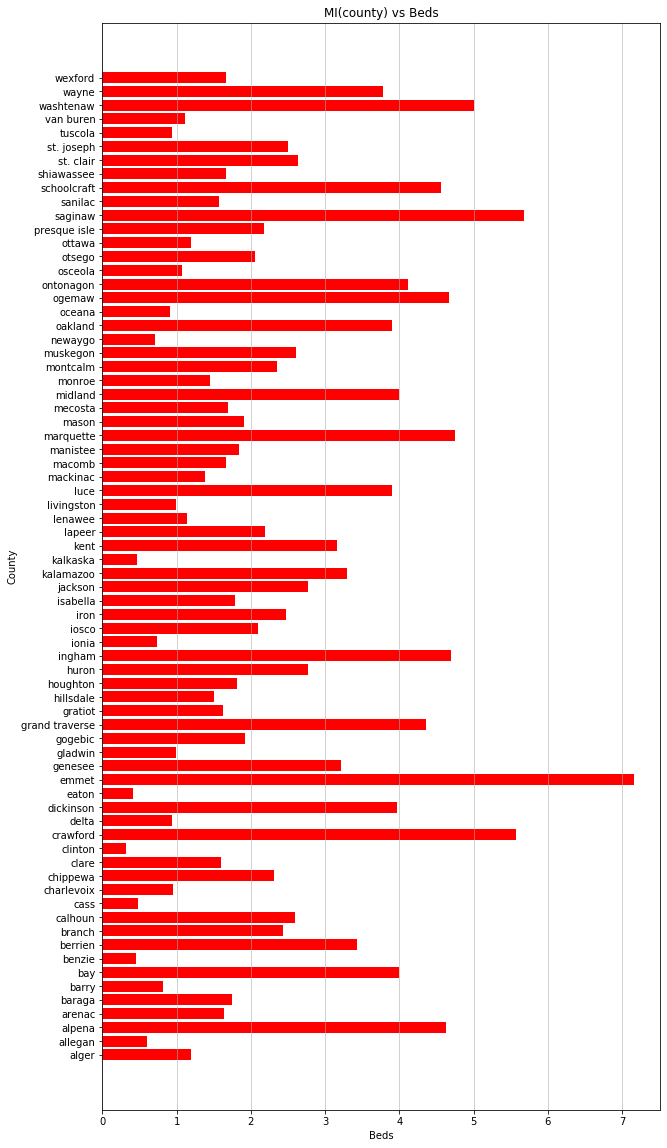

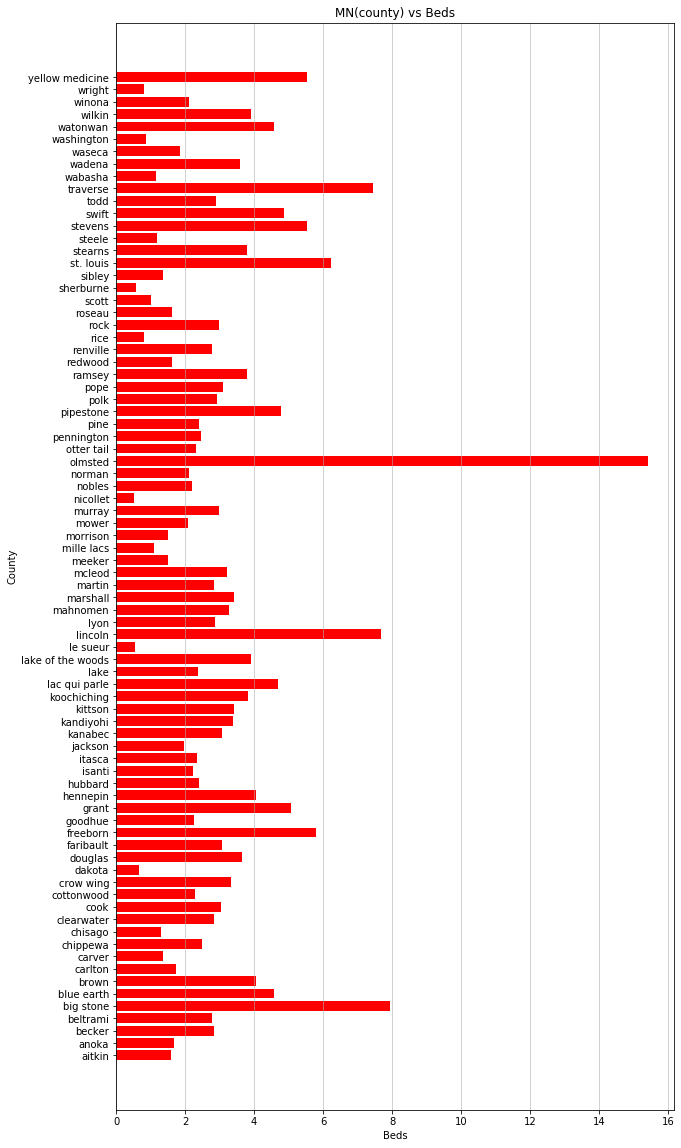

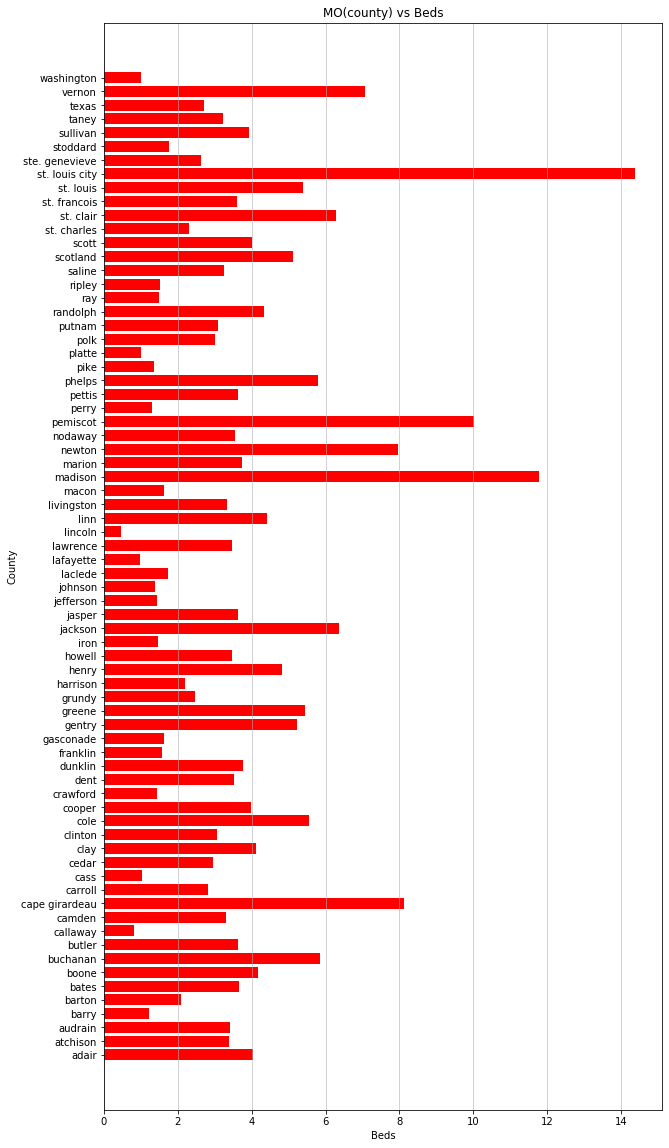

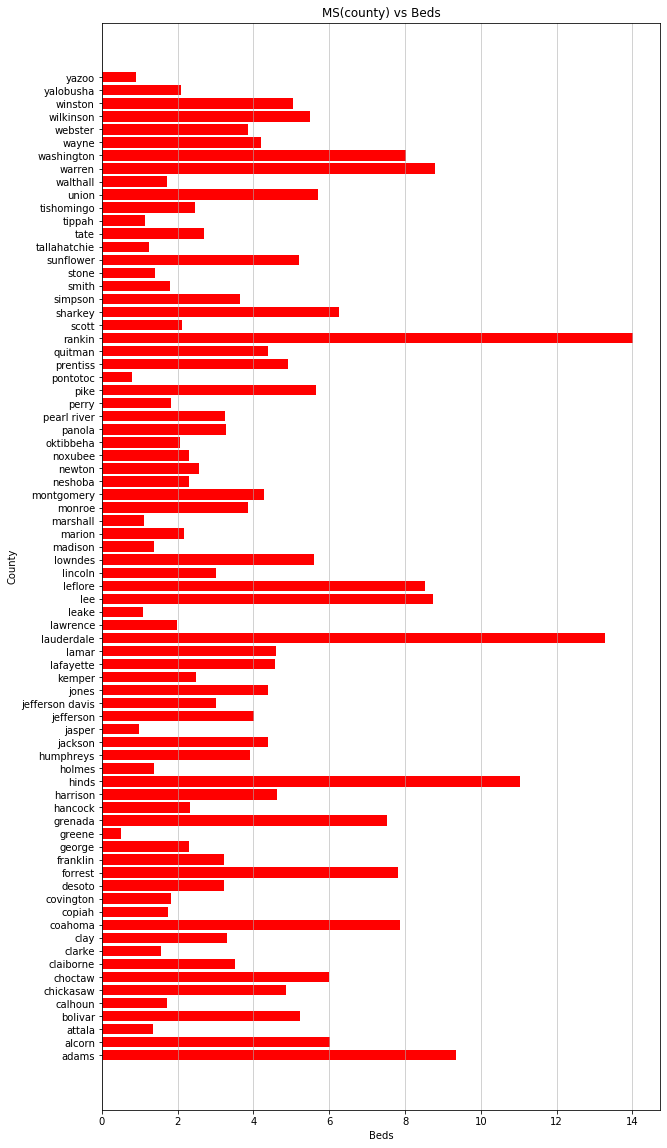

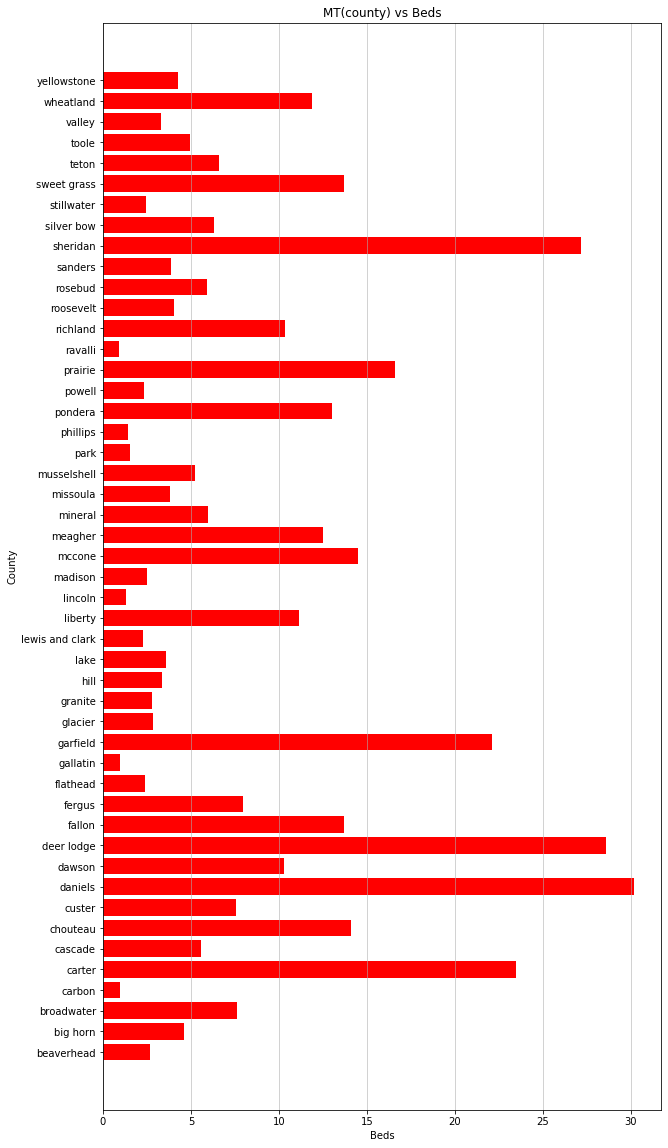

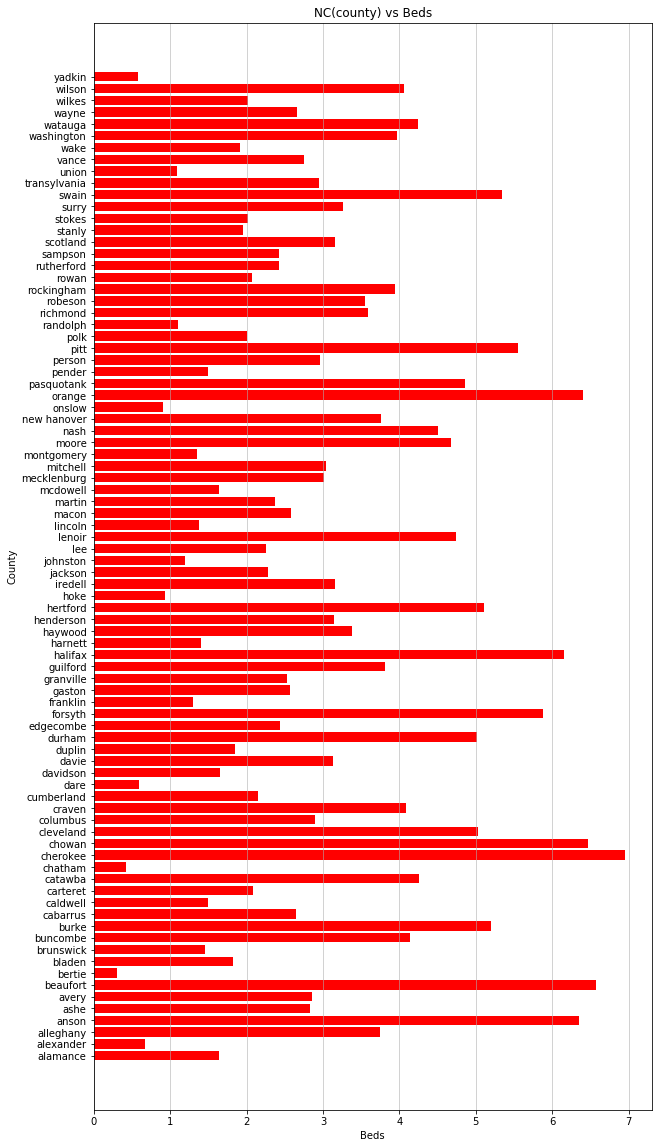

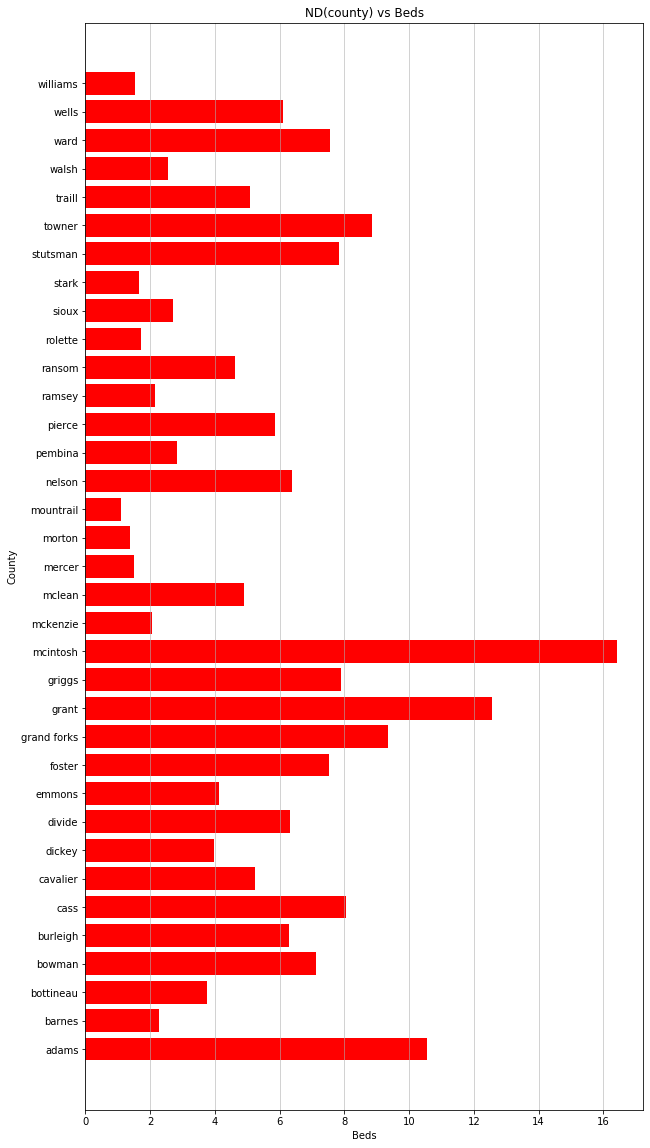

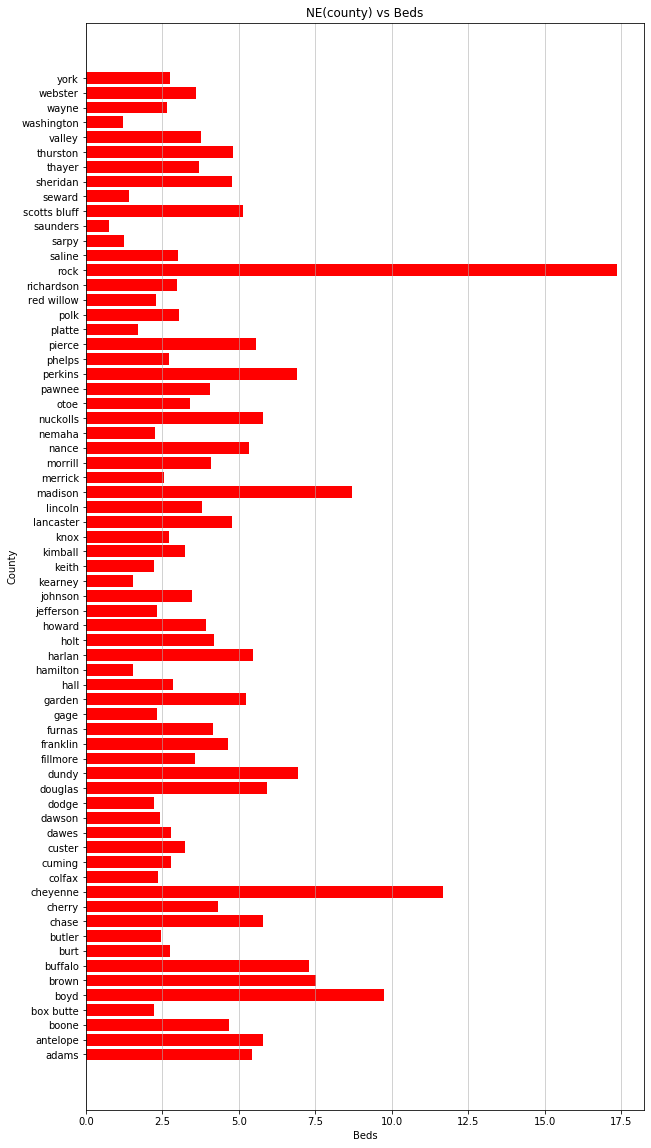

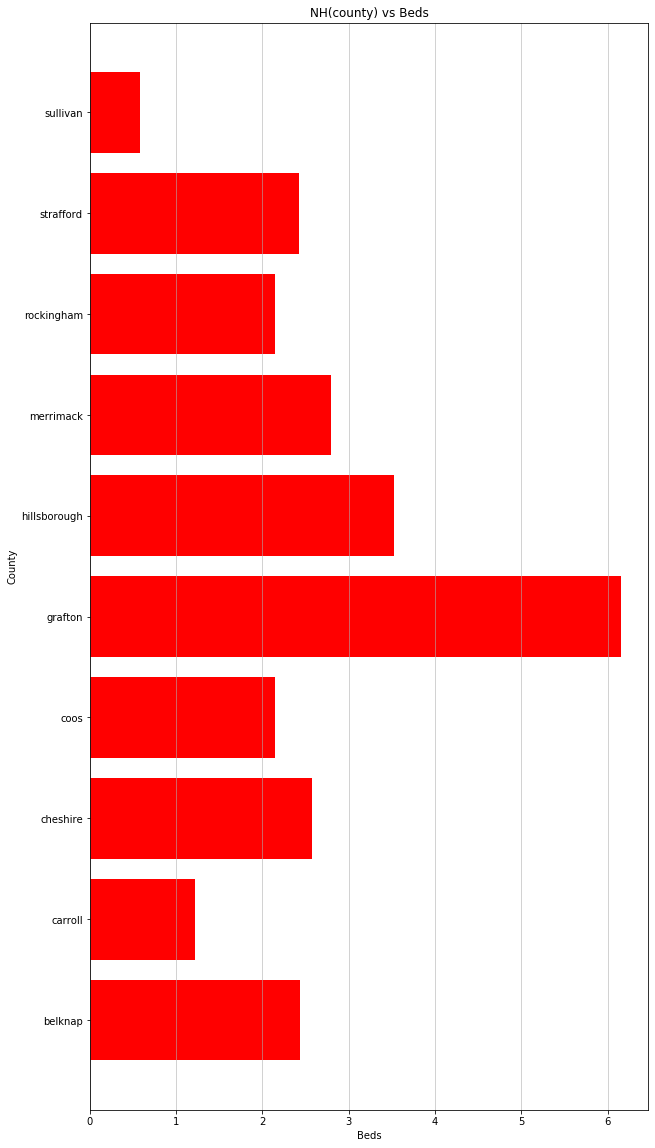

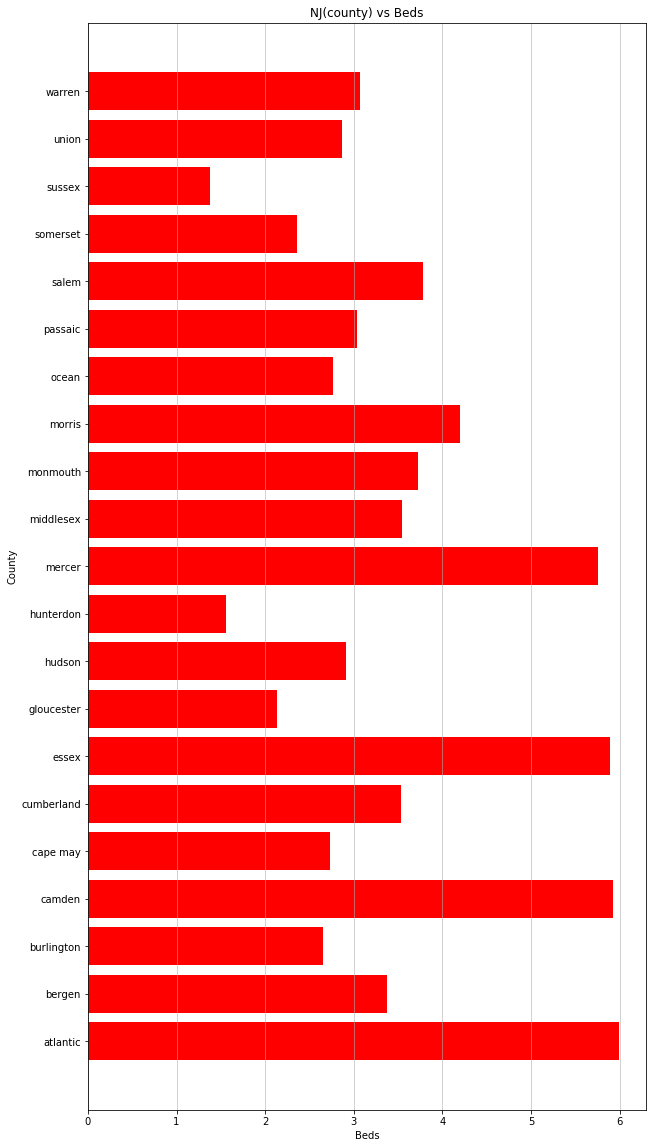

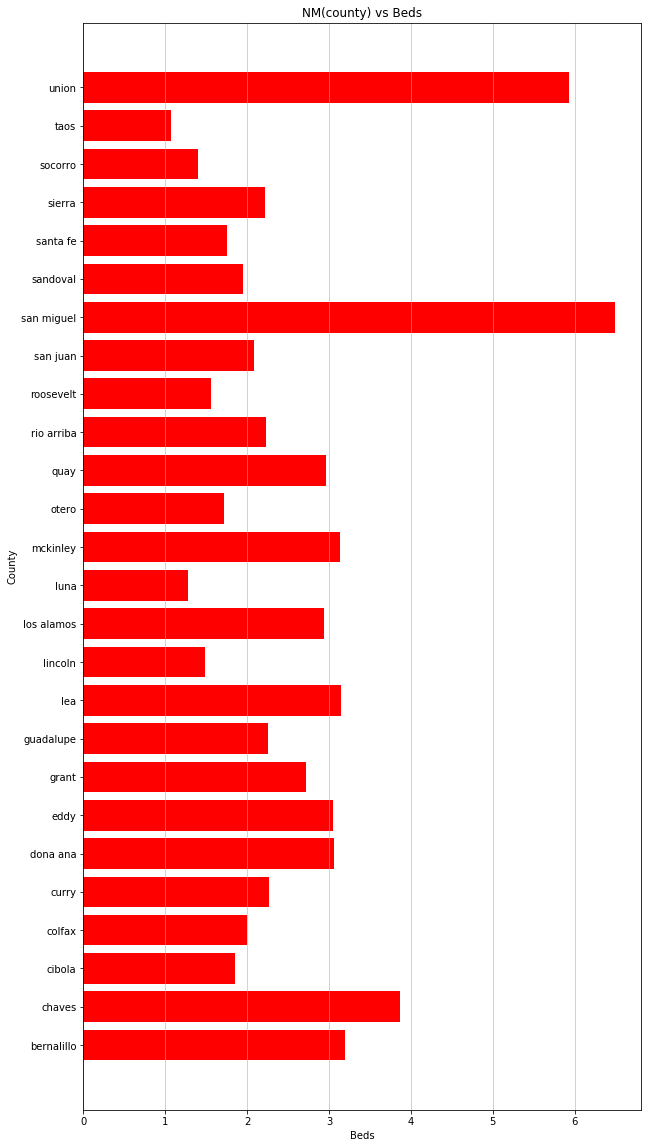

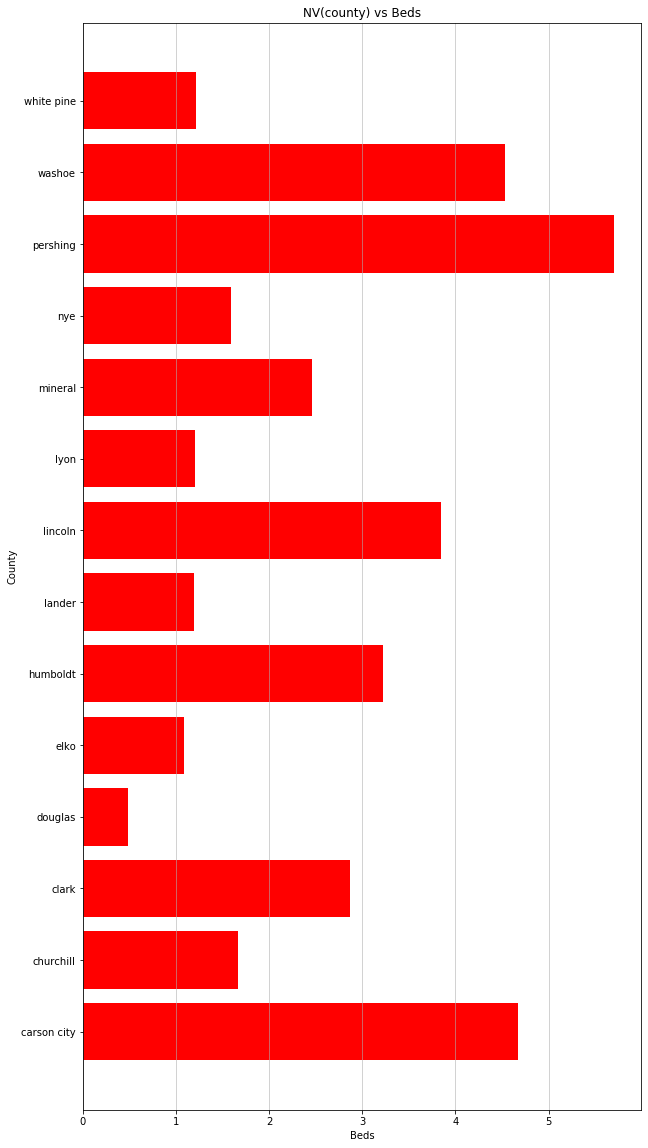

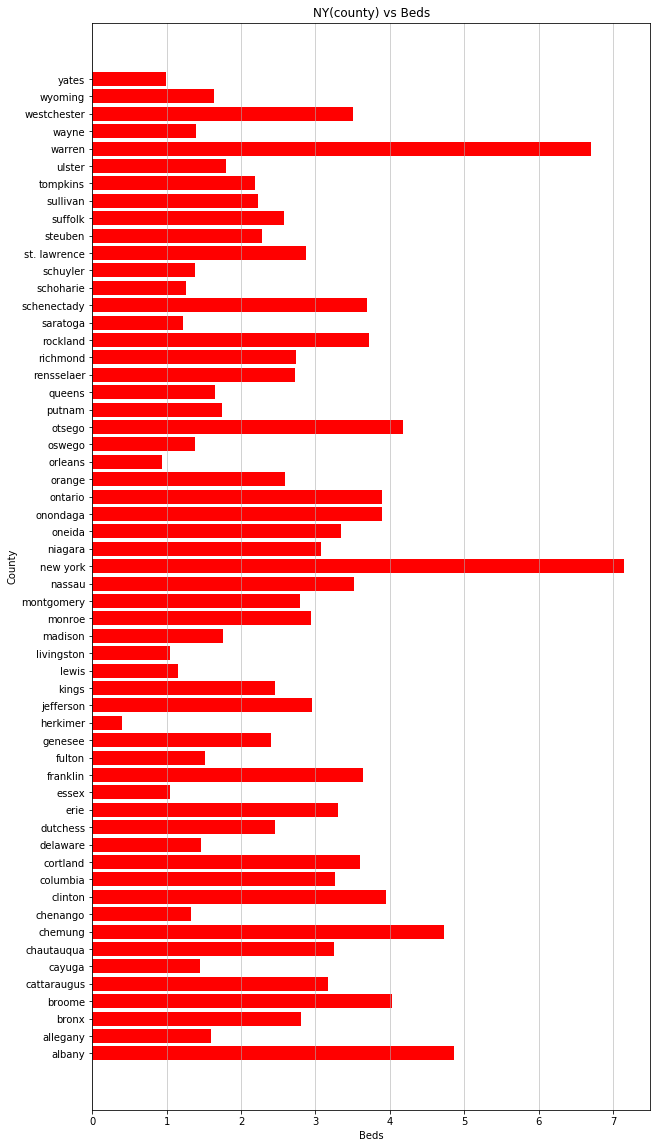

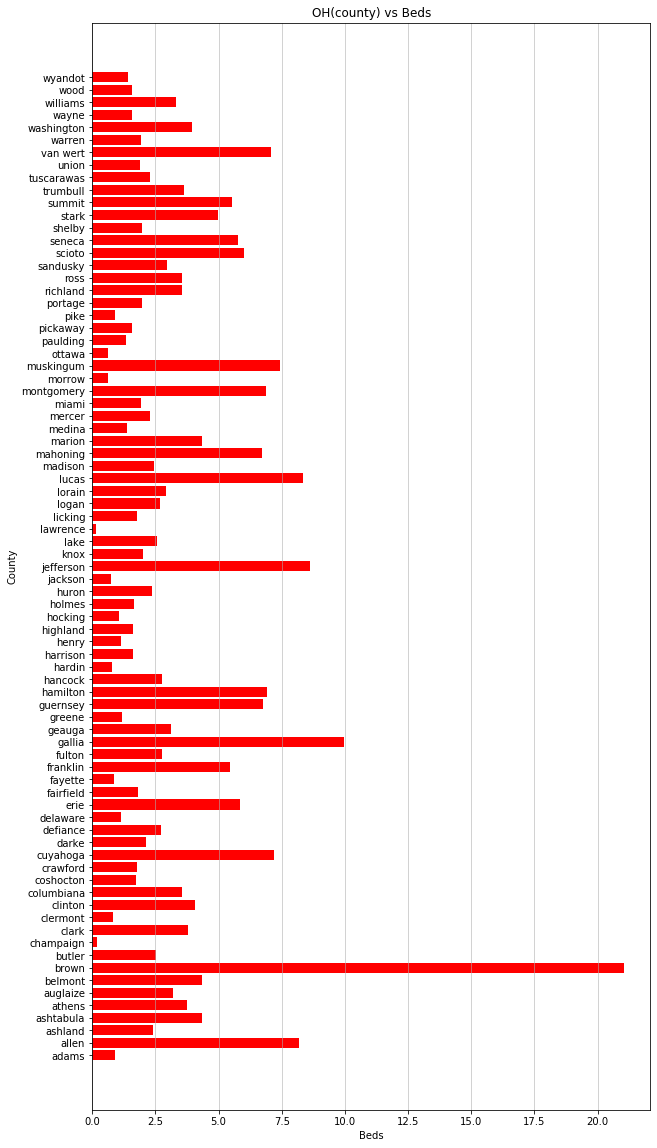

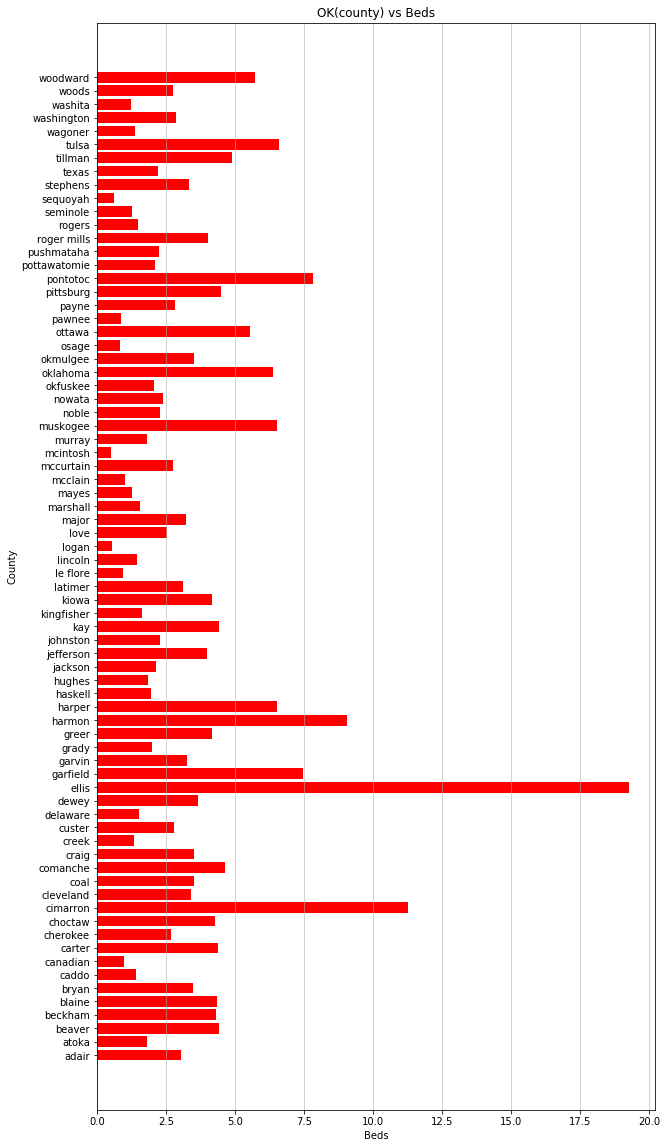

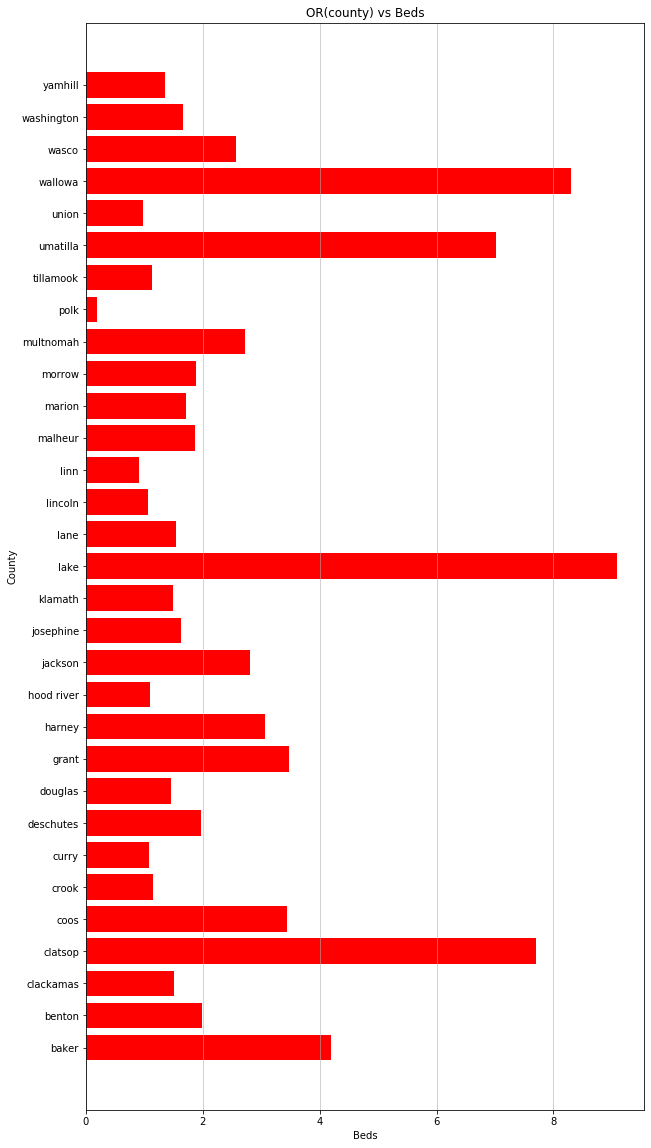

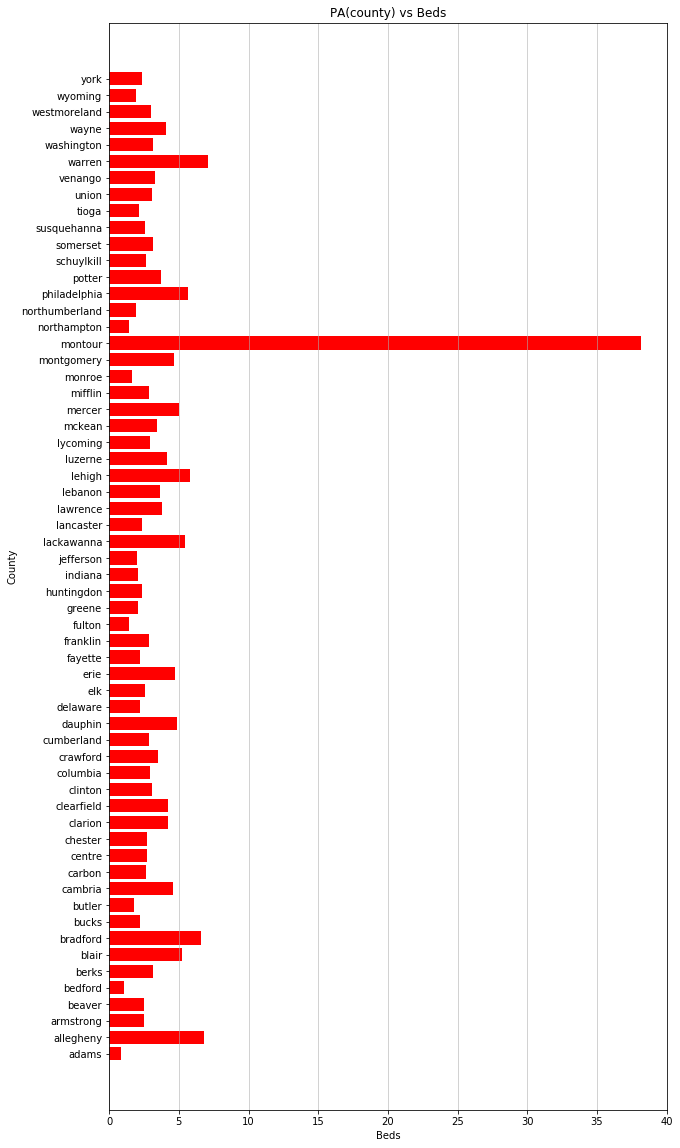

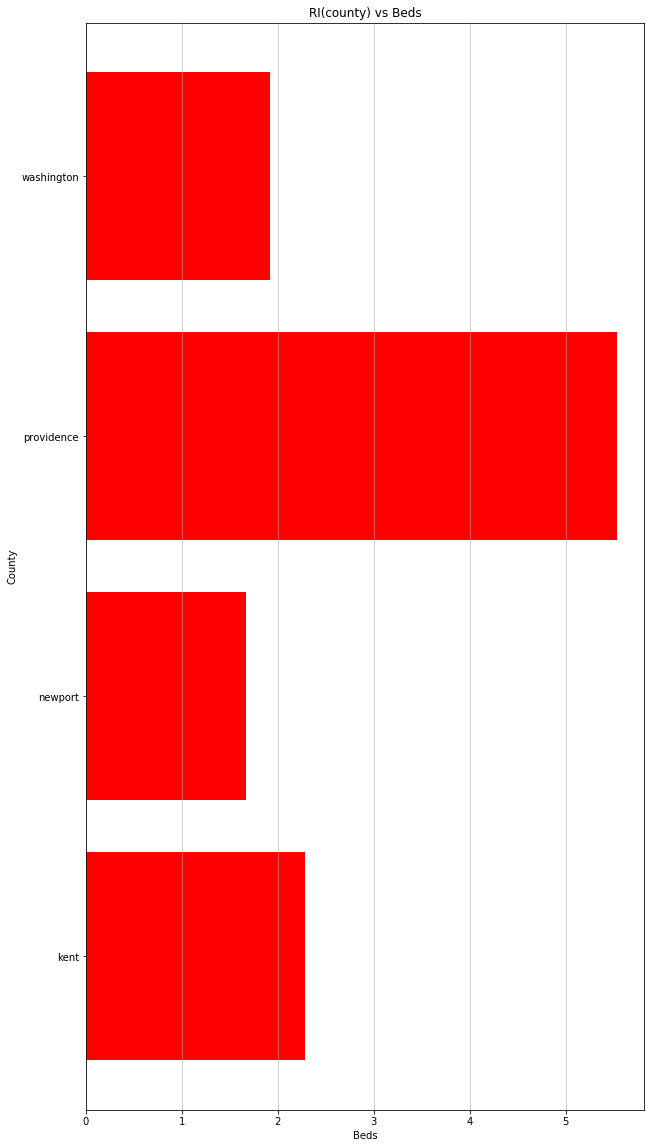

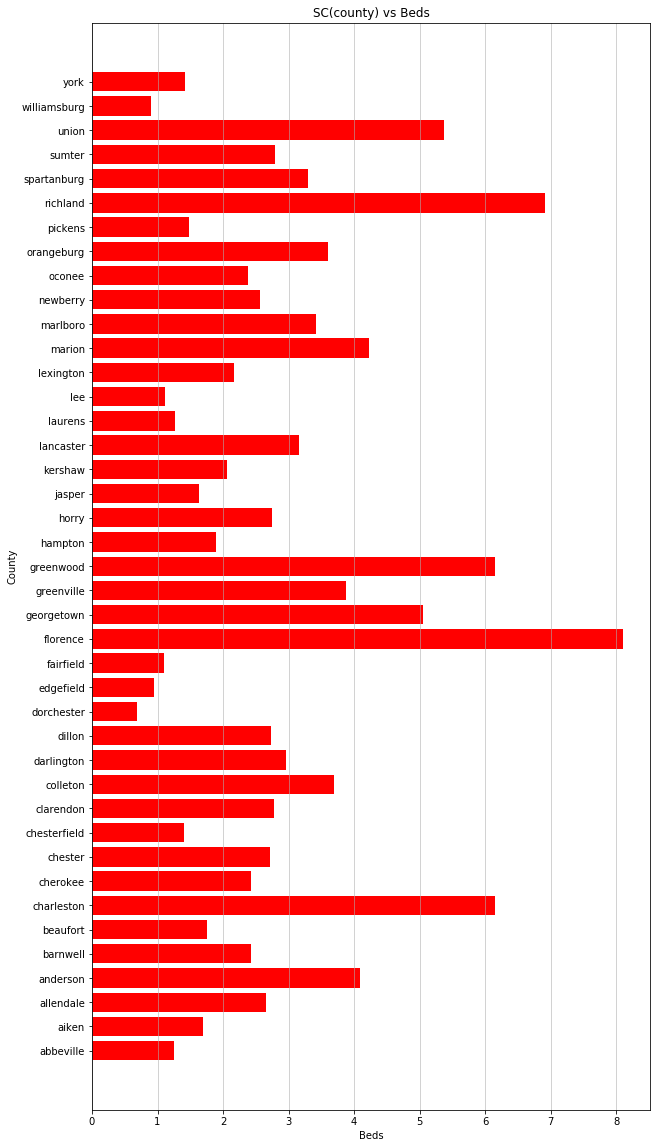

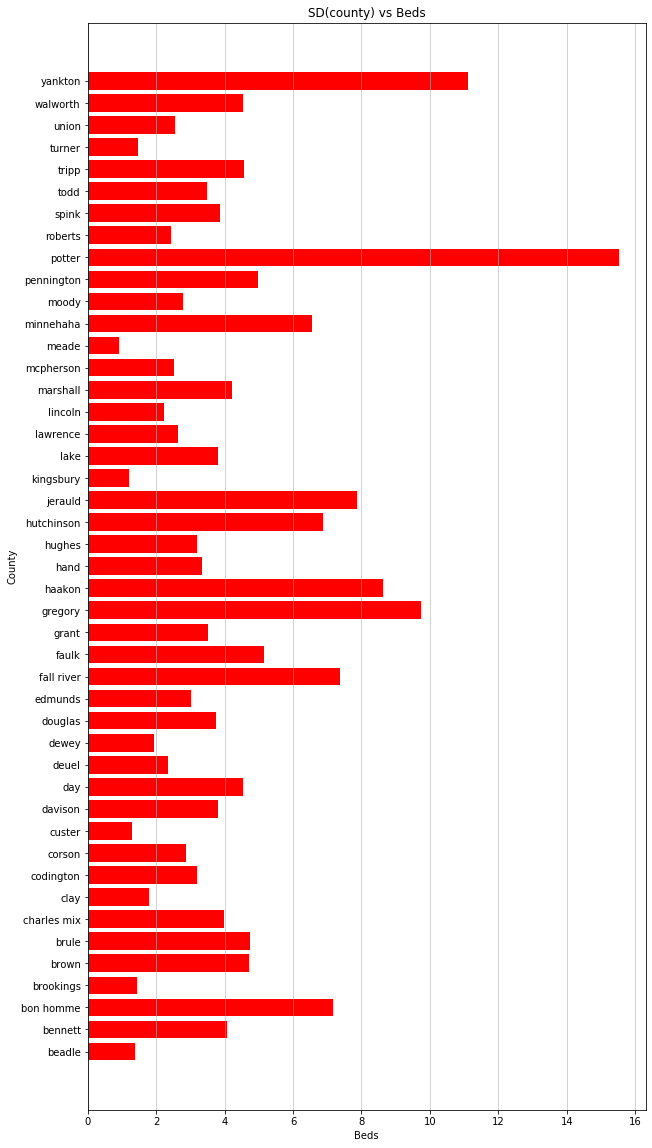

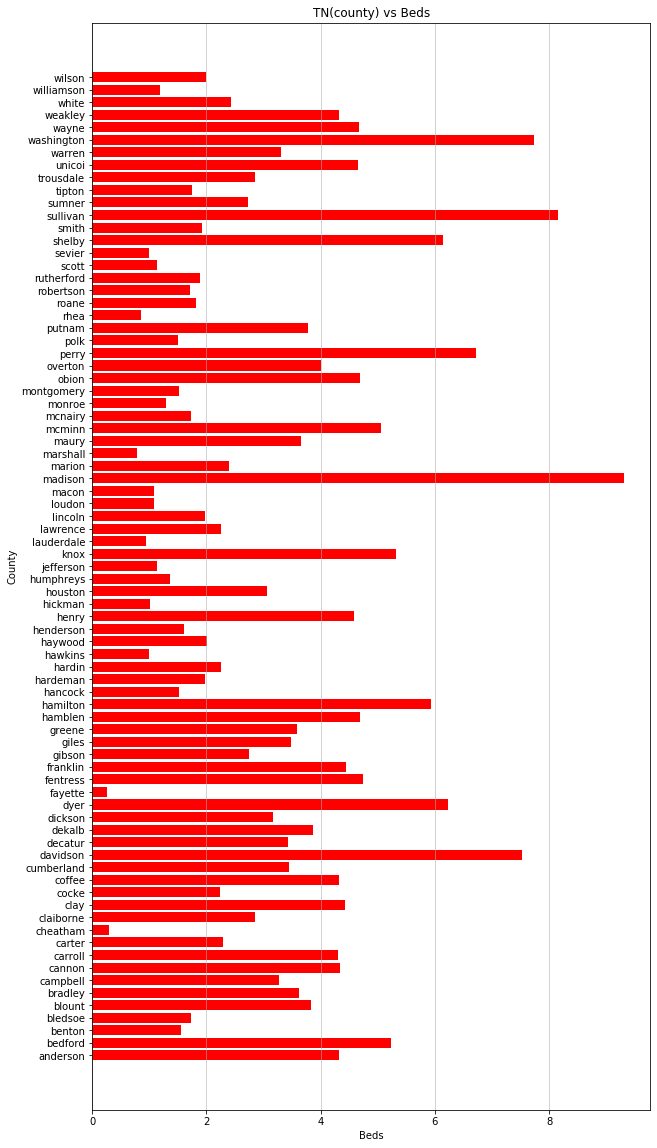

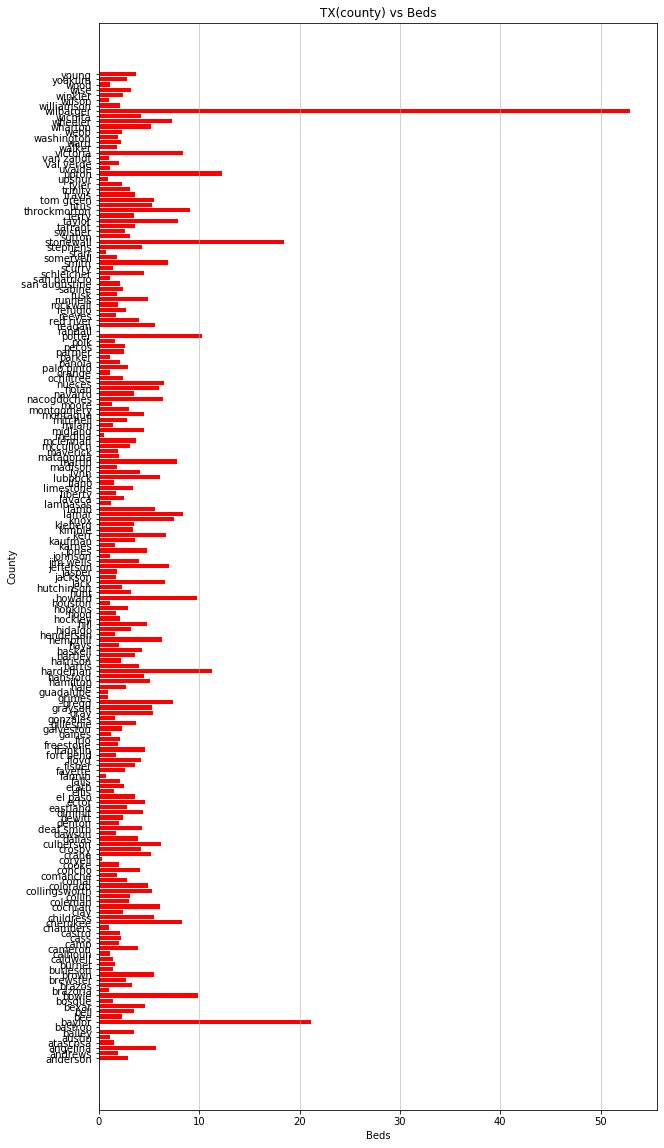

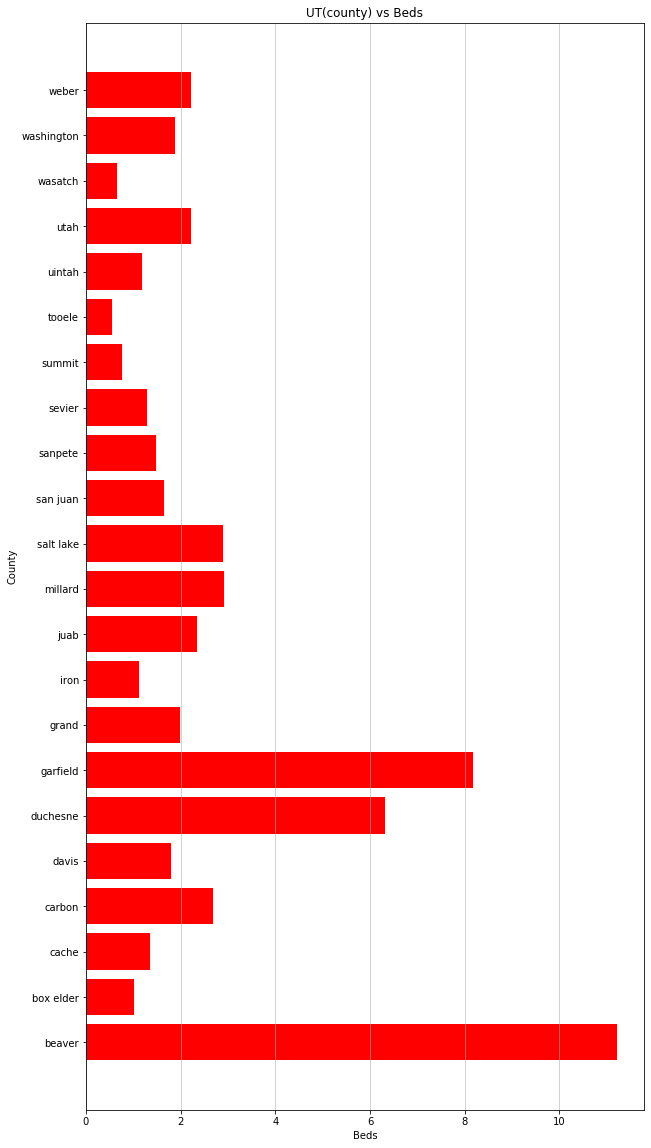

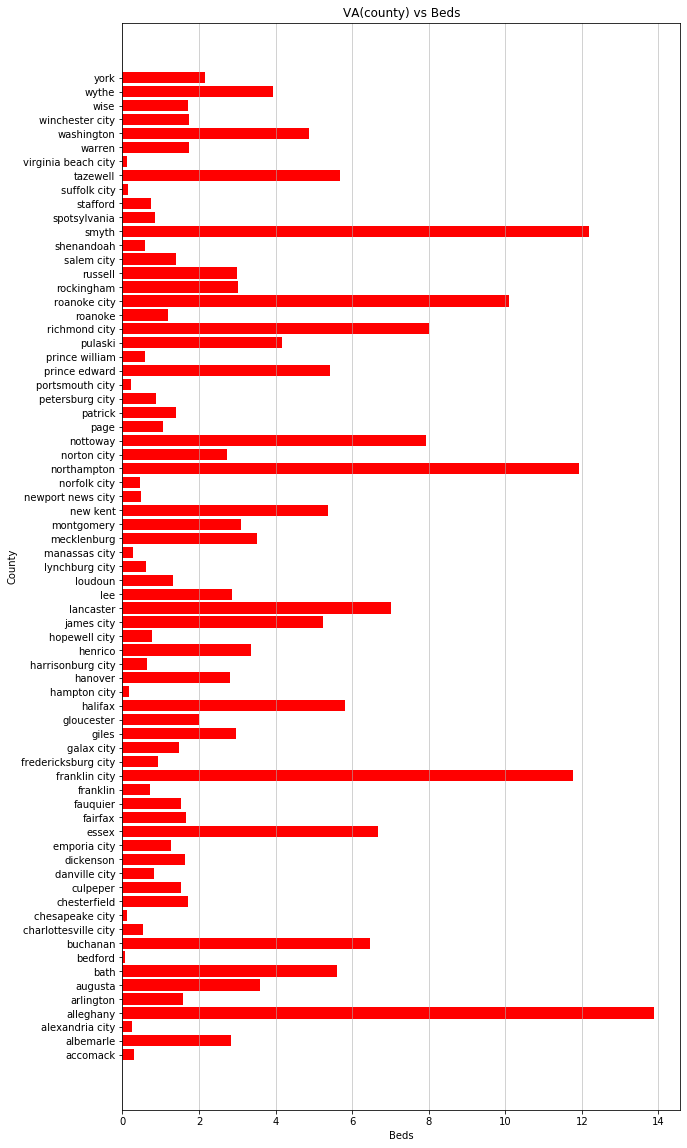

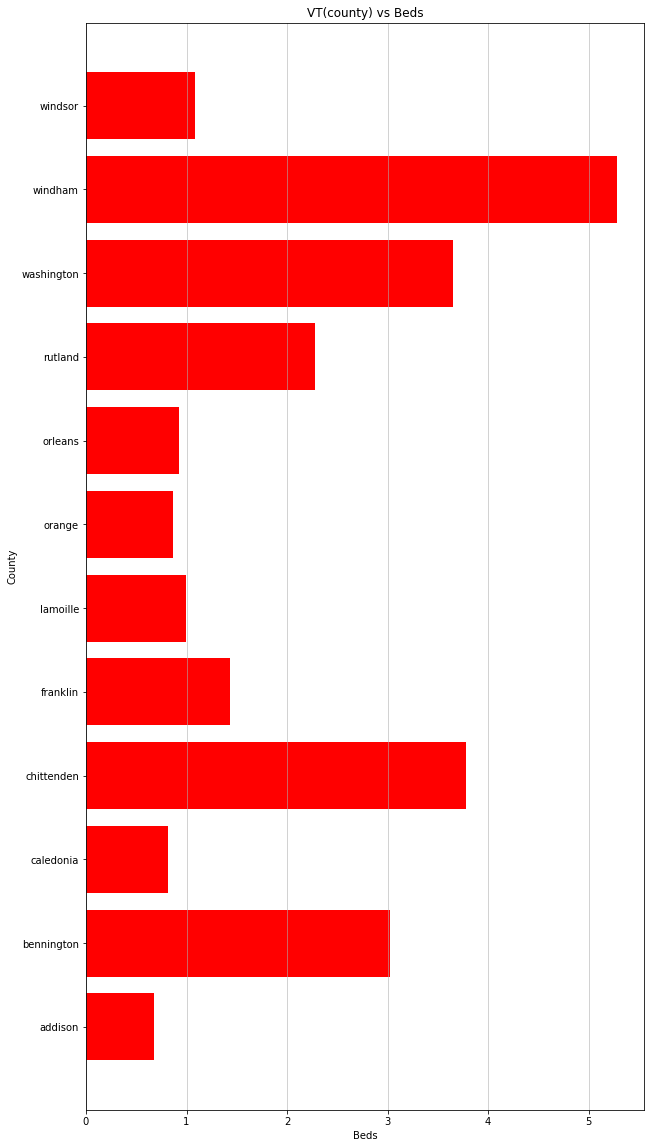

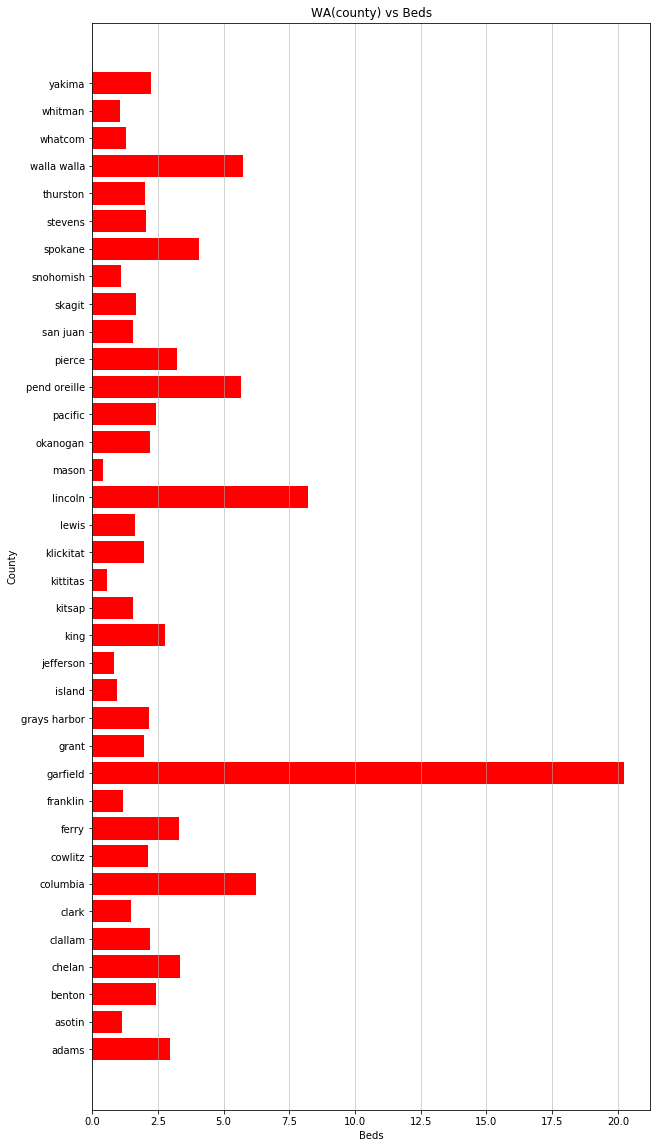

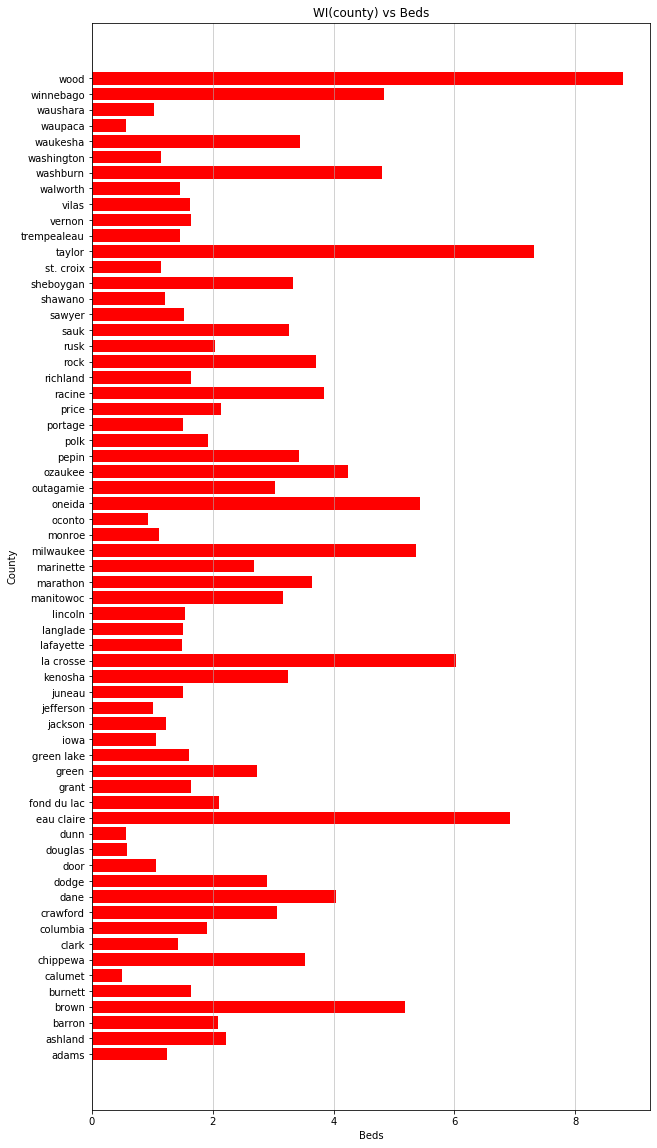

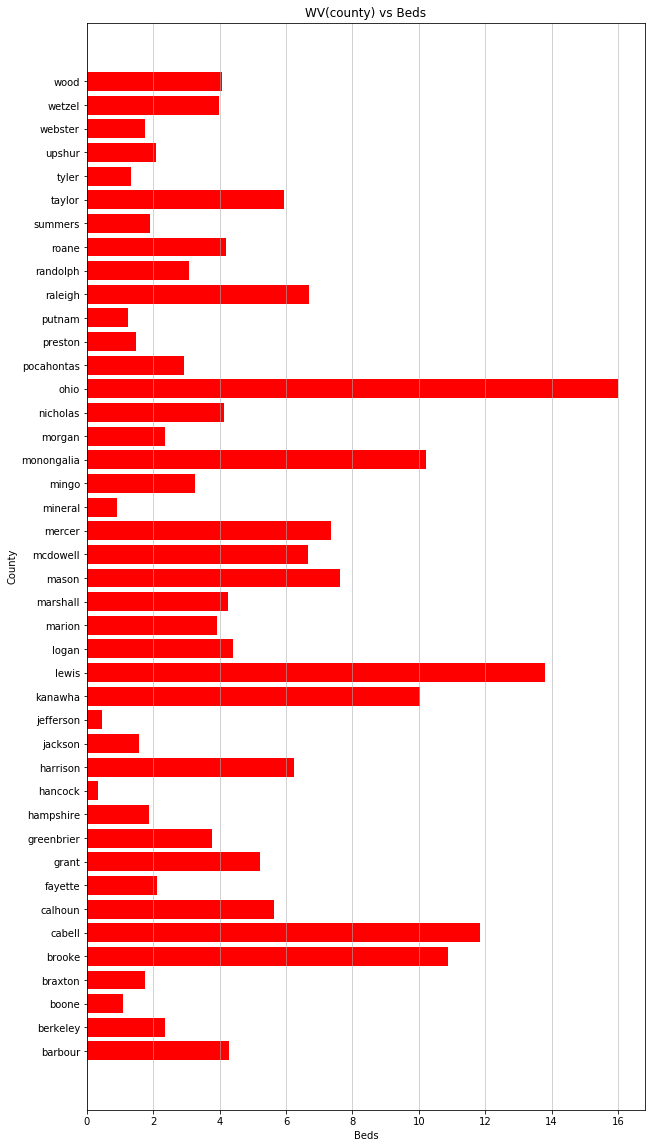

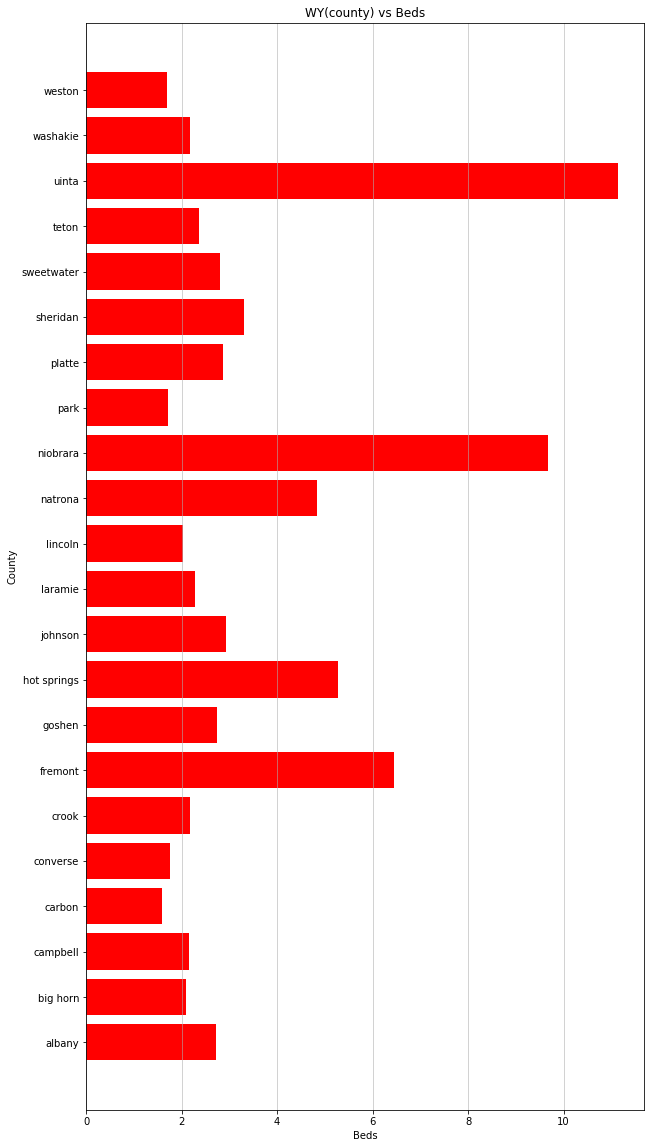

<Figure size 720x1440 with 0 Axes>

In [25]:
#Data of different states vs their county beds capacity.
usa_gs=data.groupby("state")
for s,sn in usa_gs:
    beds=sn["beds"]
    county=sn["county"]
    plt.subplot()
    plt.xlabel("Beds")
    plt.ylabel("County")
    plt.title("{}(county) vs Beds".format(s))
    plt.grid(axis="x",alpha=0.7)
    plt.barh(county,beds,color="red")
    plt.figure(figsize=(10,20))
    plt.clf()

In [26]:
#Data Filter to get total population and total bed capacity of the USA states.
states=data.groupby("state")
new_data=pd.DataFrame(columns=[])

for s,sd in states:
    sd["population"]=sd["population"].sum()
    sd["beds"]=sd.beds.sum()
    
    sd.drop("county",axis=1,inplace=True)
    sd.drop_duplicates(inplace=True)
    
    if len(new_data.columns)!=len(sd.columns):
        new_data=pd.DataFrame(columns=sd.columns)
    new_data=pd.concat((new_data,sd))
new_data.index=np.arange(len(new_data.index))

/home/akhil/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/akhil/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/home/akhil/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_g

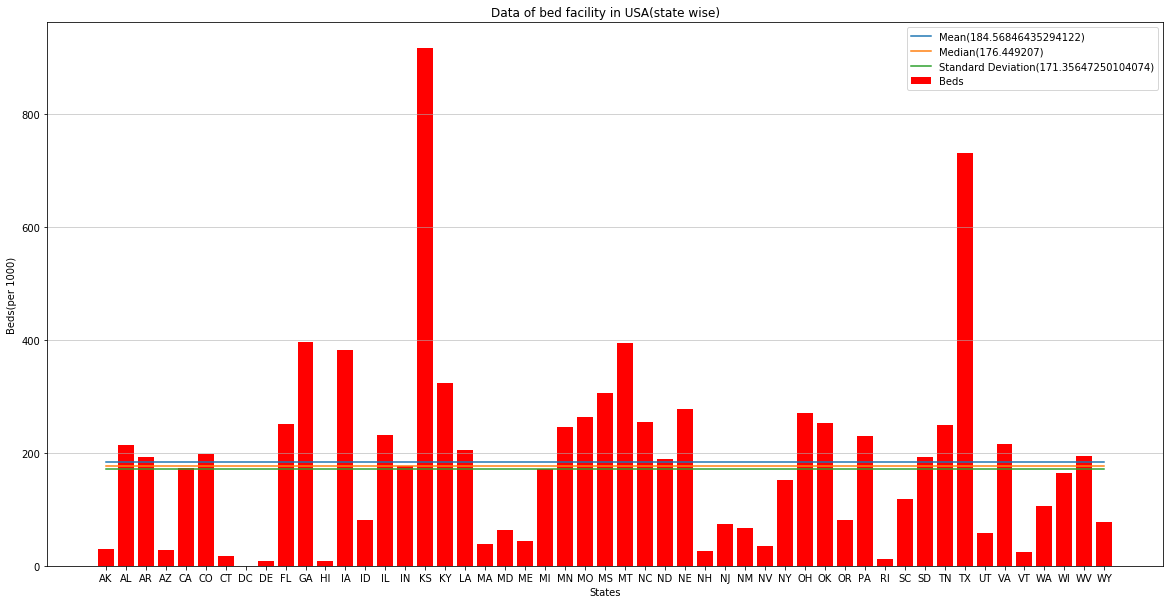

Conculsion : The state with maximum beds is KS and minimum is DC
Conclusion : Mean(184.56846435294122), Median(176.449207), Standard Deviation(171.35647250104074)
Conclusion:The number of states below mean value is 51 and above and equal mean value is 0.
 The number of states below median value is 25 and above and equal median value is 25.


In [27]:
#Stats
smean_p,smean_b=(new_data["population"].mean(),new_data["beds"].mean())
smed_p,smed_b=(new_data["population"].median(),new_data["beds"].median())
sstd_p,sstd_b=(new_data["population"].std(),new_data["beds"].std())
#State wise availability of beds (per 1000) in each states
plt.figure(figsize=(20,10))
plt.title("Data of bed facility in USA(state wise)")
plt.xlabel("States")
plt.ylabel("Beds(per 1000)")
plt.bar(new_data["state"],new_data["beds"],label="Beds",color="red")
plt.plot([smean_b]*len(new_data.index),label="Mean({})".format(smean_b))
plt.plot([smed_b]*len(new_data.index),label="Median({})".format(smed_b))
plt.plot([sstd_b]*len(new_data.index),label="Standard Deviation({})".format(sstd_b))
plt.grid(axis="y",alpha=0.7)
plt.legend()
plt.show()
print("Conculsion : The state with maximum beds is {} and minimum is {}".format(*(new_data["state"][new_data["beds"]==new_data["beds"].max()]).values,*(new_data["state"][new_data["beds"]==new_data["beds"].min()]).values))
print("Conclusion : Mean({}), Median({}), Standard Deviation({})".format(smean_b,smed_b,sstd_b))
a,b,c,d=(new_data["state"][new_data["beds"]<smean_p]).count(),(new_data["state"][new_data["beds"]>smean_p]).count(),(new_data["state"][new_data["beds"]<smed_b]).count(),(new_data["state"][new_data["beds"]>smed_b]).count()
print("Conclusion:The number of states below mean value is {} and above and equal mean value is {}.\n The number of states below median value is {} and above and equal median value is {}.".format(a,b,c,d))

In [28]:
#Stats regarding population vs states
smaxp=new_data[new_data["population"]==new_data["population"].max()]          #Data of state with maximum population
sminp=new_data[(new_data["population"]==new_data["population"].min())]        #Data of state with minimum population
smaxb=new_data[new_data["beds"]==new_data["beds"].max()]                      #Data of state with maximum beds
sminb=new_data[(new_data["beds"]==new_data["beds"].min())]
#Data of state with minimum beds
popu=new_data["population"]
beds=new_data["beds"]

#Percentage of population, beds
ps=new_data["population"].sum()
bs=new_data["beds"].sum()
ps_per=(new_data["population"]/ps)*100         #Percentage of population in each state
bs_per=(new_data["beds"]/bs)*100               #Percentage of beds in each state

print("Population(Maximum):{}\n State:{}\n Beds:{}\n Percentage:\n Max:{}\n Min:{}\n".format(*smaxp["population"].values,*smaxp["state"],*smaxp["beds"].values,ps_per.max(),ps_per.min()))
print("Population(Minimum):{}\n State:{}\n Beds:{}\n".format(*sminp["population"].values,*sminp["state"],*sminp["beds"].values))
print("Centeral Tendency(population)\n mean:{}\n median:{}\n".format(popme,popmd))
print("Centeral Tendency(beds):\n mean:{}\n meadian:{}\n".format(bme,bmd))
print("Standard Devation:\nPopulation:{}\nBeds:{}\n".format(sdp,sdb))

Population(Maximum):38981644
 State:CA
 Beds:173.78715200000002
 Percentage:
 Max:12.474129872135482
 Min:0.1834122157573136

Population(Minimum):573163
 State:WY
 Beds:76.740096

Centeral Tendency(population)
 mean:36012027.54285714
 median:26300000.0

Centeral Tendency(beds):
 mean:3324.2098628888884
 meadian:0.81519

Standard Devation:
Population:47516179.338471316
Beds:0.9056014914757053



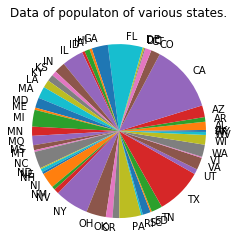

Conclusion: State with maximum population(CA) and minimum population(WY)


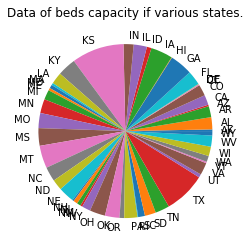

Conclusion: State with maximum population(KS) and minimum population(DC)


In [29]:
#Graphs
plt.title("Data of populaton of various states.")
plt.pie(ps_per,labels=new_data["state"])
plt.show()
print("Conclusion: State with maximum population({}) and minimum population({})".format(*smaxp["state"],*sminp["state"]))
plt.title("Data of beds capacity if various states.")
plt.pie(bs_per,labels=new_data["state"])
plt.show()
print("Conclusion: State with maximum population({}) and minimum population({})".format(*smaxb["state"],*sminb["state"]))

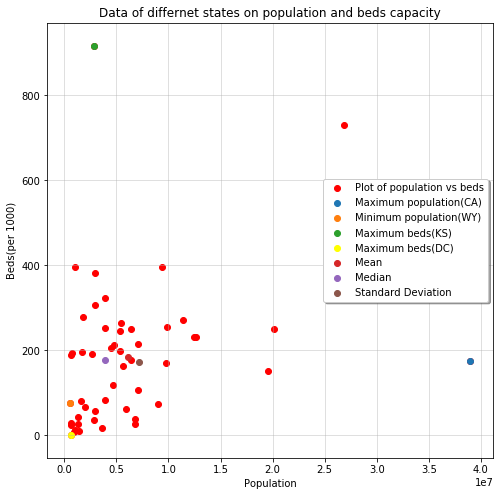

Conclusion:Maximum population(CA)
Conclusion:Minimum population(WY)
Conclusion:Maximum beds(KS)
Conclusion:Maximum beds(DC)


In [30]:
#Stats
smaxp_u=new_data[new_data["population"]==new_data["population"].max()]
sminp_u=new_data[new_data["population"]==new_data["population"].min()]
smaxb_u=new_data[new_data["beds"]==new_data["beds"].max()]
sminb_u=new_data[new_data["beds"]==new_data["beds"].min()]

#Graphical data between Population and beds(per 1000) in USA states
plt.figure(figsize=(8,8))
plt.scatter(new_data["population"],new_data["beds"],color="red",label="Plot of population vs beds")
plt.xlabel("Population")
plt.ylabel("Beds(per 1000)")
plt.title("Data of differnet states on population and beds capacity")
plt.scatter(smaxp_u["population"],smaxp_u["beds"],label="Maximum population({})".format(*smaxp_u["state"]))
plt.scatter(sminp_u["population"],sminp_u["beds"],label="Minimum population({})".format(*sminp_u["state"]))
plt.scatter(smaxb_u["population"],smaxb_u["beds"],label="Maximum beds({})".format(*smaxb_u["state"]))
plt.scatter(sminb_u["population"],sminb_u["beds"],label="Maximum beds({})".format(*sminb_u["state"]),color="yellow")

plt.scatter(smean_p,smean_b,label="Mean")
plt.scatter(smed_p,smed_b,label="Median")
plt.scatter(sstd_p,sstd_b,label="Standard Deviation")
plt.grid(alpha=0.5)
plt.legend(loc="best",shadow=True)
plt.show()
print("Conclusion:Maximum population({})".format(*smaxp_u["state"]))
print("Conclusion:Minimum population({})".format(*sminp_u["state"]))
print("Conclusion:Maximum beds({})".format(*smaxb_u["state"]))
print("Conclusion:Maximum beds({})".format(*sminb_u["state"]))

# Part 3

Comparative Analysis between India and USA

In [31]:
#Stats
f_data=pd.DataFrame((("India",df_ind["population"].sum(),df_ind["beds"].sum()*1000),
                   ("USA",new_data["population"].sum(),new_data["beds"].sum()*1000))
                   ,columns=["state","population","beds"])
f_data=f_data.set_index("state")

f_data
#Total population and beds of each countries.

,population,beds
state,,
India,1260420964,38004.522
USA,312499905,9412991.682


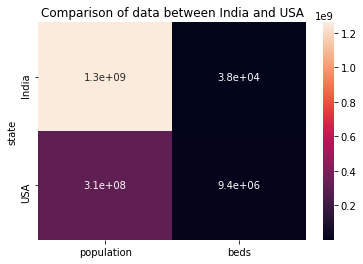

Conclusion: The popualtion of India is 1260420964 and its beds capacity(per person) is 38004.522000000004.
Conclusion: The popualtion of USA is 312499905 and its beds capacity(per person) is 9412991.682000002.


In [32]:
#Heatmap representaion of the population and beds in both the countries.
sns.heatmap(f_data,annot=True)
plt.title("Comparison of data between India and USA")
plt.show()
print("Conclusion: The popualtion of India is {} and its beds capacity(per person) is {}.".format(f_data.iloc[0,0],f_data.iloc[0,1]))
print("Conclusion: The popualtion of USA is {} and its beds capacity(per person) is {}.".format(f_data.iloc[1,0],f_data.iloc[1,1]))

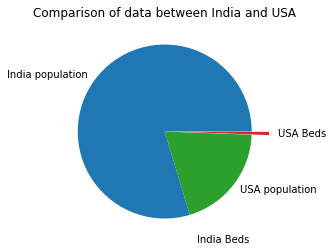

Conclusion: The popualtion of India is 1260420964 and its beds capacity(per person) is 38004.522000000004.
Conclusion: The popualtion of USA is 312499905 and its beds capacity(per person) is 9412991.682000002.


In [33]:
#Pie graph representation of of the datas.
plt.title("Comparison of data between India and USA")
inf=[df_ind["population"].sum(),df_ind["beds"].sum()*1000,new_data["population"].sum(),new_data["beds"].sum()*1000]
d=["India population","India Beds","USA population","USA Beds"]
plt.pie(inf,labels=d,explode=[0,0.2,0,0.2])
plt.show()
print("Conclusion: The popualtion of India is {} and its beds capacity(per person) is {}.".format(f_data.iloc[0,0],f_data.iloc[0,1]))
print("Conclusion: The popualtion of USA is {} and its beds capacity(per person) is {}.".format(f_data.iloc[1,0],f_data.iloc[1,1]))

# Conclusion

The data after comparing shows the India lacks beds count in comaprison to USA.
The data of various states and their beds availability is shown in the charts and stats.